# Sixth Homework

## Working with OLS
1. Rerun the last regression where, only including oecd countries in the subset. A list of OECD countries is provided. You will need to find the 3 letter ISO code associated with each country. (Hint: Reimport the dataframe we saved early in the lesson)

In [1]:
oecd_countries = ["Australia", "Austria", "Belgium", "Canada", "Chile", "Colombia", "Costa Rica",
            "Czech Republic", "Denmark", "Estonia", "Finland", "France", "Germany",
            "Greece", "Hungary", "Iceland", "Ireland", "Israel", "Italy", "Japan", 
            "Latvia", "Lithuania","Luxembourg", "Mexico", "Netherlands", "New Zealand", "Norway",
             "Poland","Portugal", "Slovakia", "Slovenia", "South Korea", "Spain", "Sweden",
             "Switzerland", "Turkey", "United Kingdom", "United States"]

2. Plot the residuals in a histogram. Explain why the shape of the distribution of these residuals are distinct from the shape of the residuals plotted in the first regressions from this lesson.

3. Plot separate scatter plots for each variable (x-axis) against the predictor (y-axis). ThenPlot seperate scatter plots for each variable (x-axis) against the predictor (y-axis). Do we observe bias in the resdiuals when controlling for each variable? Why does this matter?

4. Plot the observed and predicted values of RGDP Per Capita for each individual country.

5. Repeat questions 1 through 4 using 2 year lags and differences instead of 5 year lags and differences.

## 1.

In [3]:
pd.__version__

'1.5.3'

In [4]:
data = pd.read_excel("EFWAndRGDP.xlsx")

In [41]:
oecd_data = data[data["Countries"].isin(oecd_countries)]
oecd_data.set_index(["Countries", "Year"], inplace = True)

In [42]:
oecd_data

ISO_Code_3 ISO_Code_2    World Bank Region  \
Countries     Year                                              
Australia     1970        AUS         AU  East Asia & Pacific   
              1975        NaN         AU  East Asia & Pacific   
              1980        NaN         AU  East Asia & Pacific   
              1985        NaN         AU  East Asia & Pacific   
              1990        NaN         AU  East Asia & Pacific   
...                       ...        ...                  ...   
United States 2016        NaN         US        North America   
              2017        NaN         US        North America   
              2018        NaN         US        North America   
              2019        NaN         US        North America   
              2020        NaN         US        North America   

                   World Bank Current Income Classification, 1990-present (L=Low income, LM=Lower middle income, UM=Upper middle income, H=High income)  \
Countries     Year                                                                                                                                        
Australia     1970                                                NaN                                                                                     
              1975                                                NaN                                                                                     
              1980                                                NaN                                                                                     
              1985                                                NaN                                                                                     
              1990                                                  H                                                                                     
...                                                               ...                                                                                     
United States 2016                                                  H                                                                                     
              2017                                                  H                                                                                     
              2018                                                  H                                                                                     
              2019                                                  H                                                                                     
              2020                                                  H                                                                                     

                     Summary  Size of Government  \
Countries     Year                                 
Australia     1970  7.291154            6.863768   
              1975  7.002204            6.255684   
              1980  7.316469            6.339449   
              1985  7.670016            6.259326   
              1990  7.927001            6.708215   
...                      ...                 ...   
United States 2016  8.339536            7.252009   
              2017  8.379486            7.354358   
              2018  8.279612            7.409095   
              2019  8.249649            7.320058   
              2020  7.970000            6.790621   

                    Legal System and Property Rights  Sound Money  \
Countries     Year                                                  
Australia     1970                          7.775615     9.581113   
              1975                          8.034445     8.346907   
              1980                          8.037057     9.085686   
              1985                          8.540345     9.089736   
              1990                          8.398730     9.018318 

In [70]:
y_var = ["RGDP Per Capita"]
x_vars = ['Size of Government',
 'Legal System and Property Rights',
 'Sound Money',
 'Freedom to Trade Internationally',
 'Regulation']

In [10]:
import numpy as np
import statsmodels.api as sm

oecd_country_codes = data[data['Countries'].isin(oecd_countries)].index.get_level_values(0).unique()

years_diff = 5
reg_data = oecd_data[x_vars + y_var]
log_data = np.log(reg_data)
reg_data["RGDP Per Capita"] = log_data.groupby("Countries")[
    "RGDP Per Capita"].diff(years_diff)
r_df = reg_data.dropna(axis = 0, how = "any")
y = r_df[y_var]
X = r_df[x_vars]
X["Constant"] = 1
results = sm.OLS(y, X).fit()
r_df
#reg_data = reg_data[reg_data.index.get_level_values("Year") % 5 == 0]

r_df["Predictor"] = results.predict()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        RGDP Per Capita   R-squared:                       0.214
Model:                            OLS   Adj. R-squared:                  0.208
Method:                 Least Squares   F-statistic:                     38.45
Date:                Mon, 06 May 2024   Prob (F-statistic):           5.91e-35
Time:                        13:44:43   Log-Likelihood:                 199.12
No. Observations:                 714   AIC:                            -386.2
Df Residuals:                     708   BIC:                            -358.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Size of 

C:\Users\aleah\AppData\Local\Temp\ipykernel_21824\1859690915.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reg_data["RGDP Per Capita"] = log_data.groupby("Countries")[
C:\Users\aleah\AppData\Local\Temp\ipykernel_21824\1859690915.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r_df["Predictor"] = results.predict()
C:\Users\aleah\AppData\Local\Temp\ipykernel_21824\1859690915.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

In [ ]:
log_data.groupby(0)[
    "RGDP Per Capita"].diff(years_diff)

In [ ]:
log_data

In [ ]:
reg_vars = list(data.keys())
reg_vars

## 2.

In [15]:
import matplotlib.pyplot as plt

C:\Users\aleah\AppData\Local\Temp\ipykernel_21824\1880864322.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r_df["Residuals"] = results.resid


Text(0.5, 1.0, 'Histogram of Residuals')

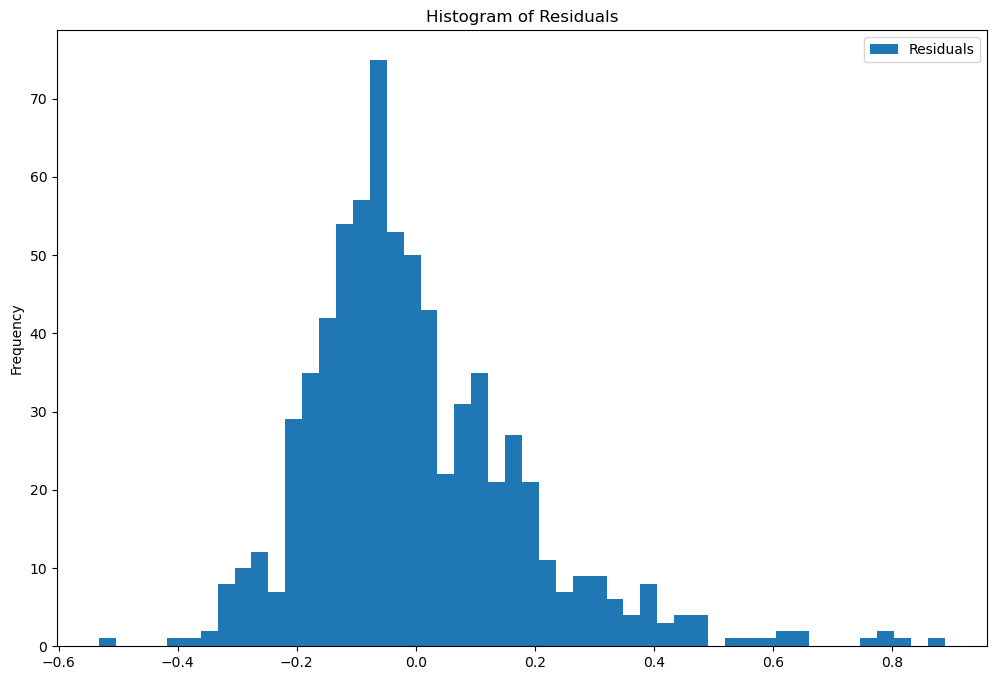

In [14]:
r_df["Residuals"] = results.resid
fig,ax = plt.subplots(figsize = (12,8))
r_df[["Residuals"]].plot.hist(bins = 50, ax = ax)
plt.title("Histogram of Residuals")

The shape of this histogram is different from the shape of the ones in the lesson because we are only using specific countries and so some of the data from the lesson is not included here. 

## 3.

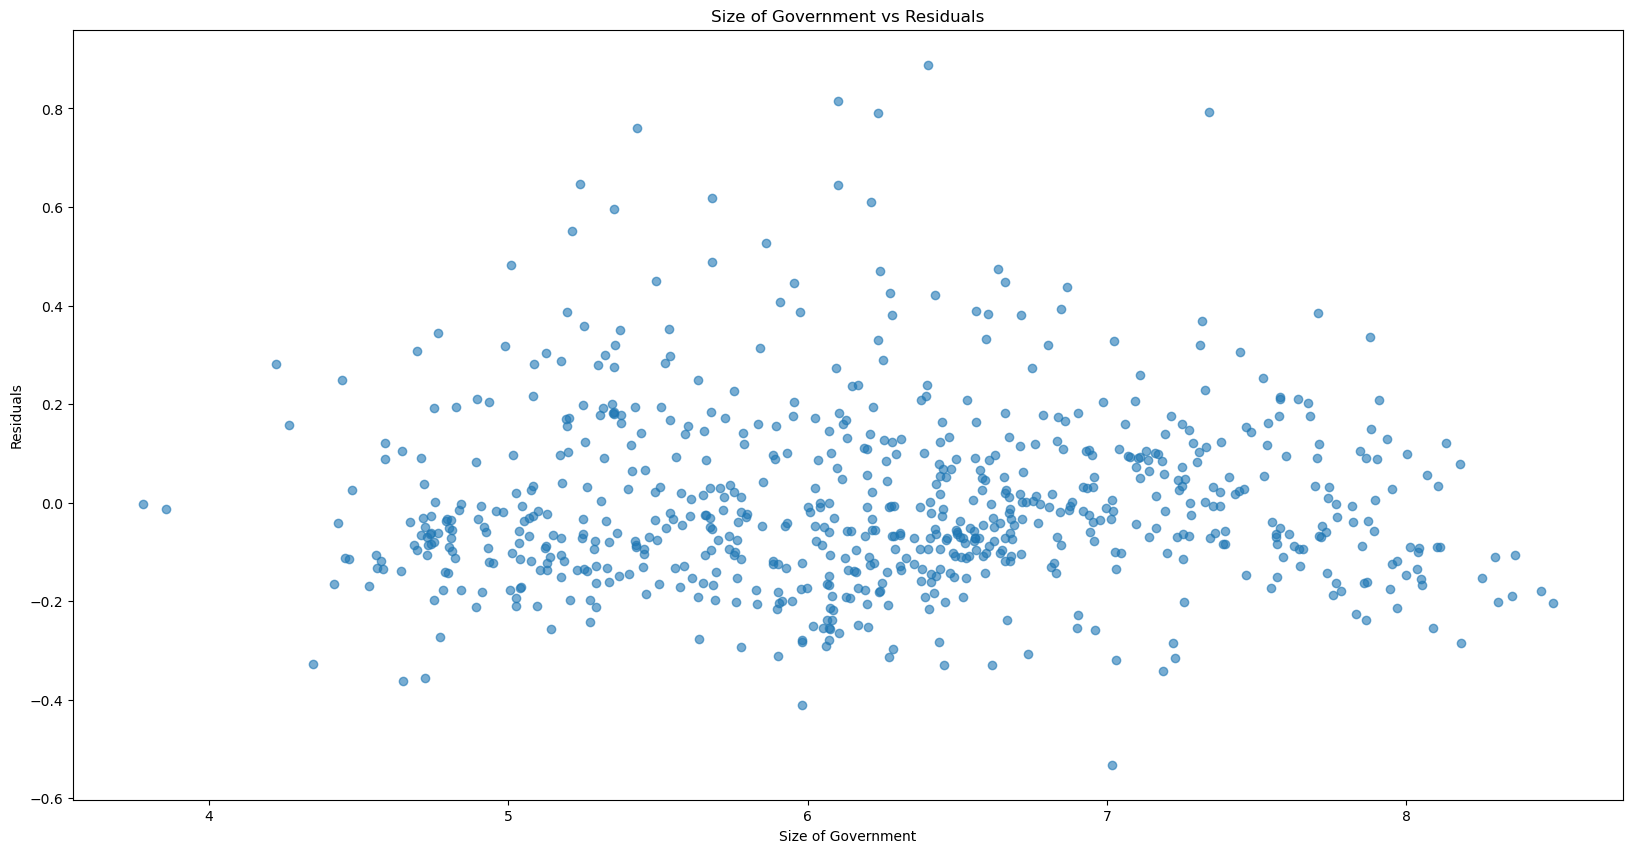

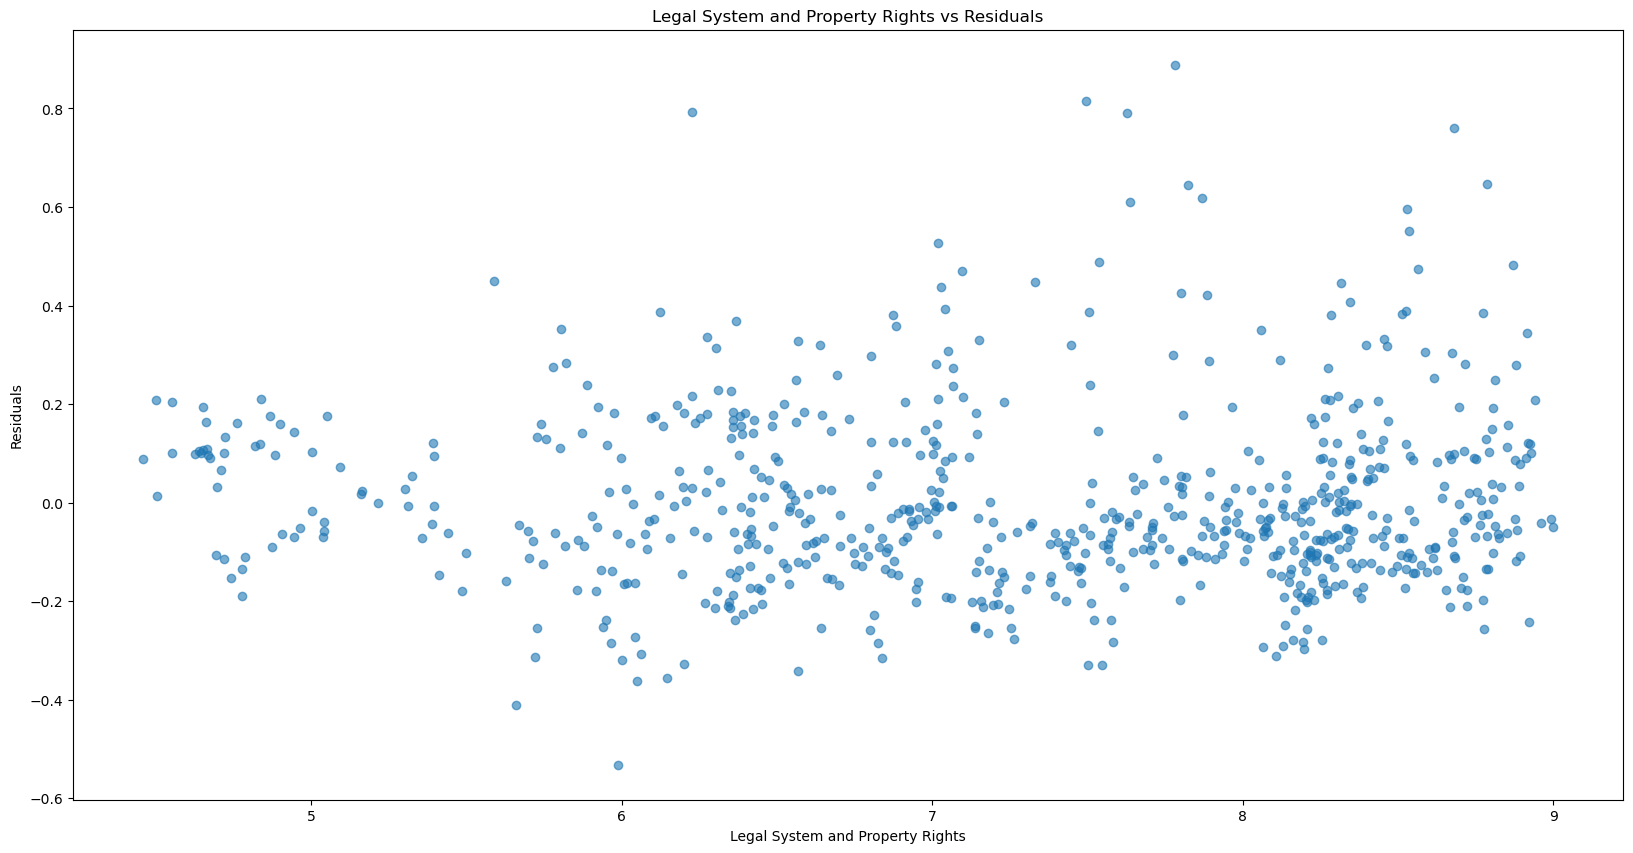

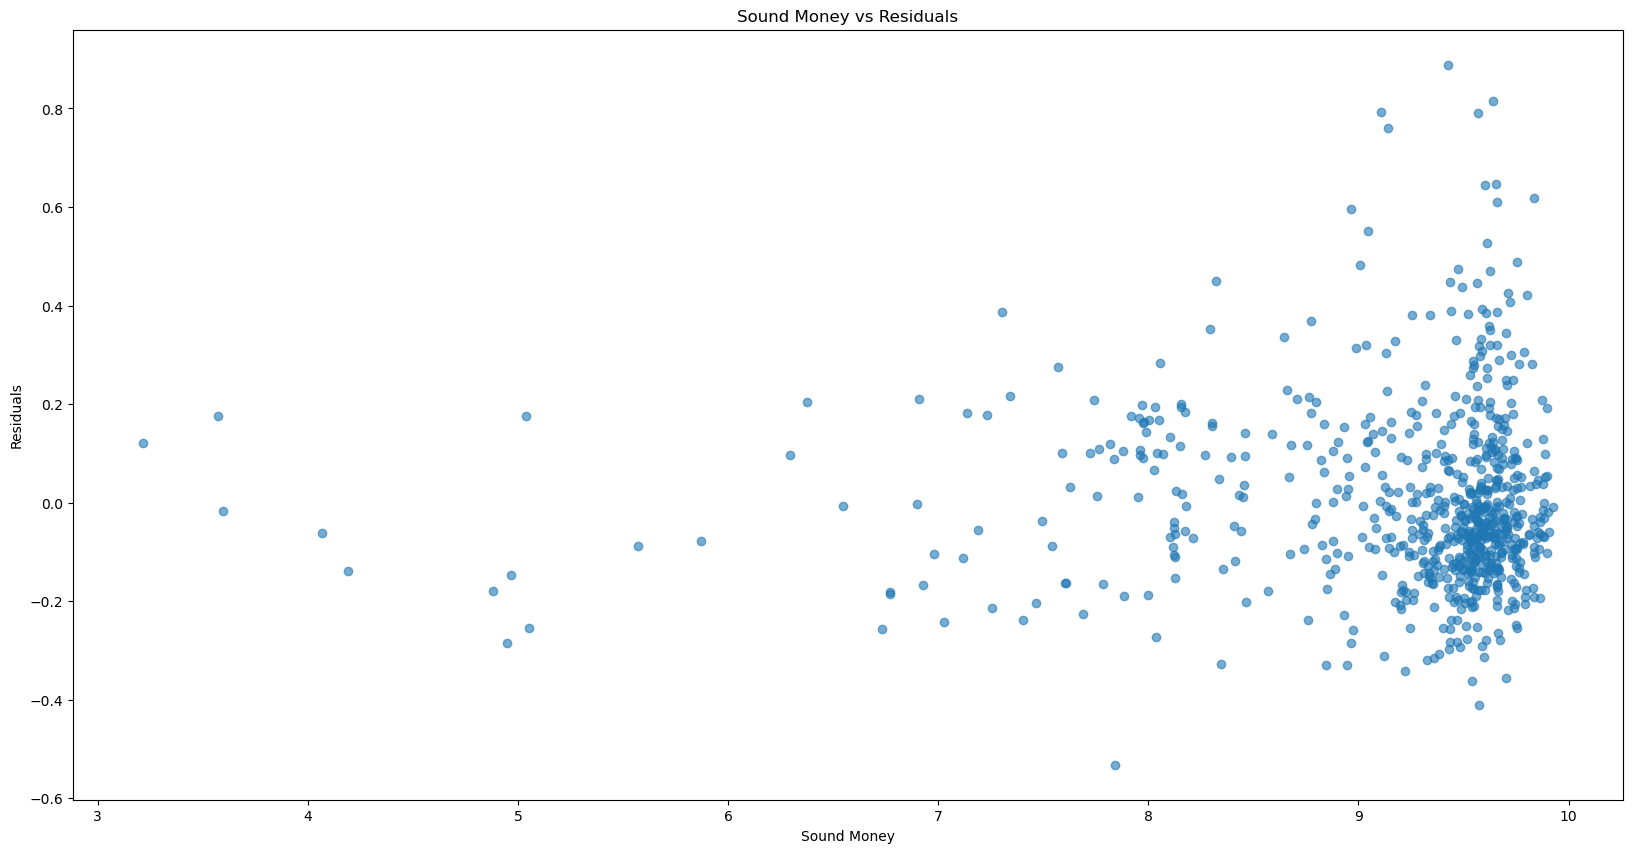

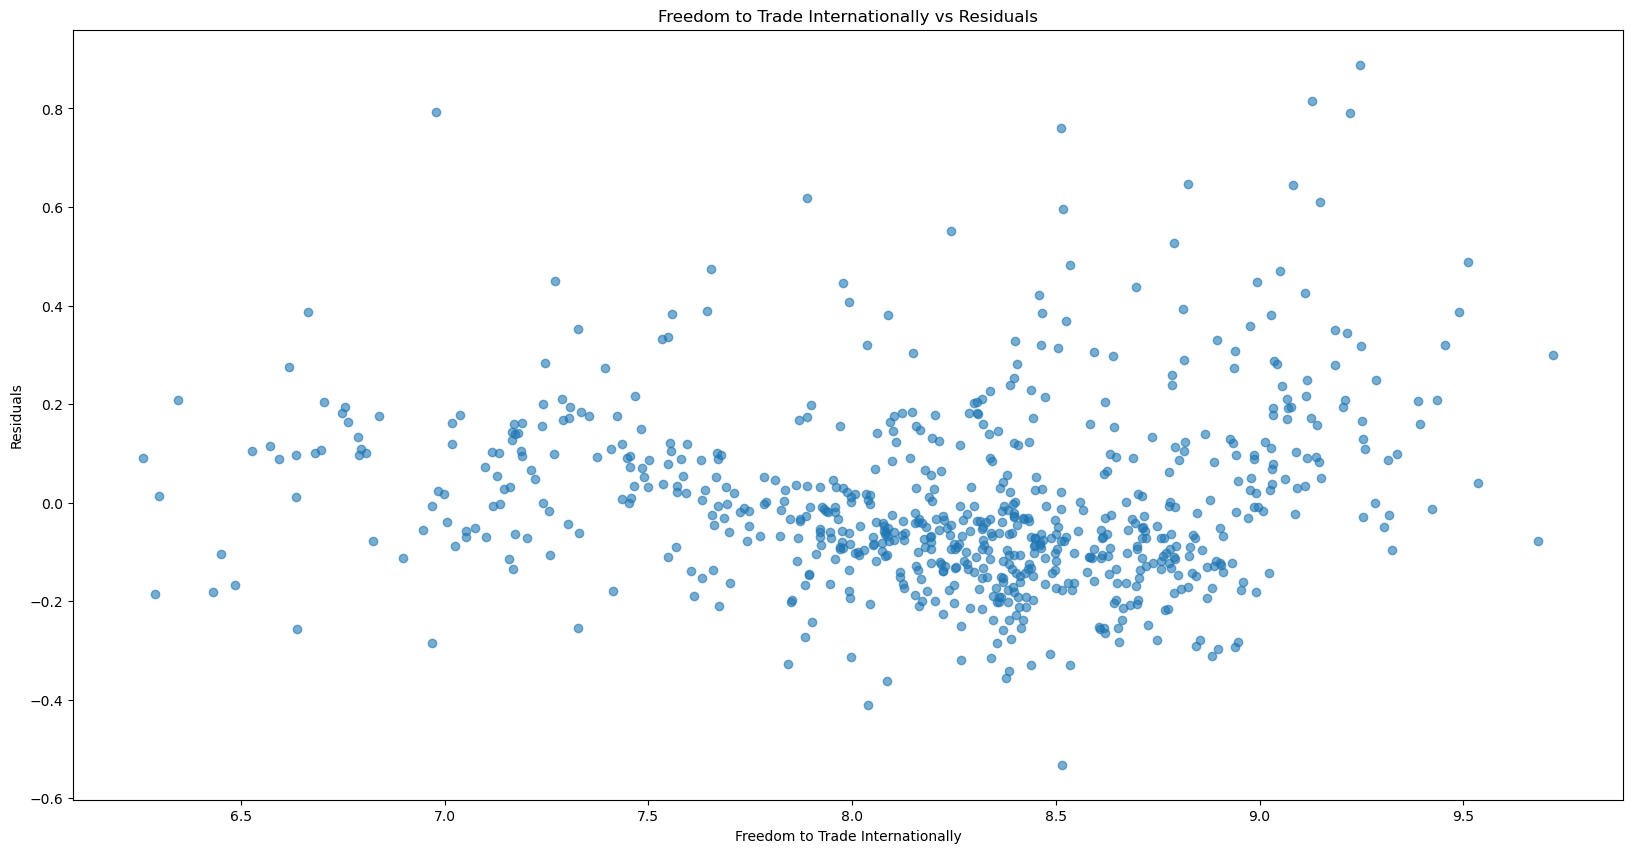

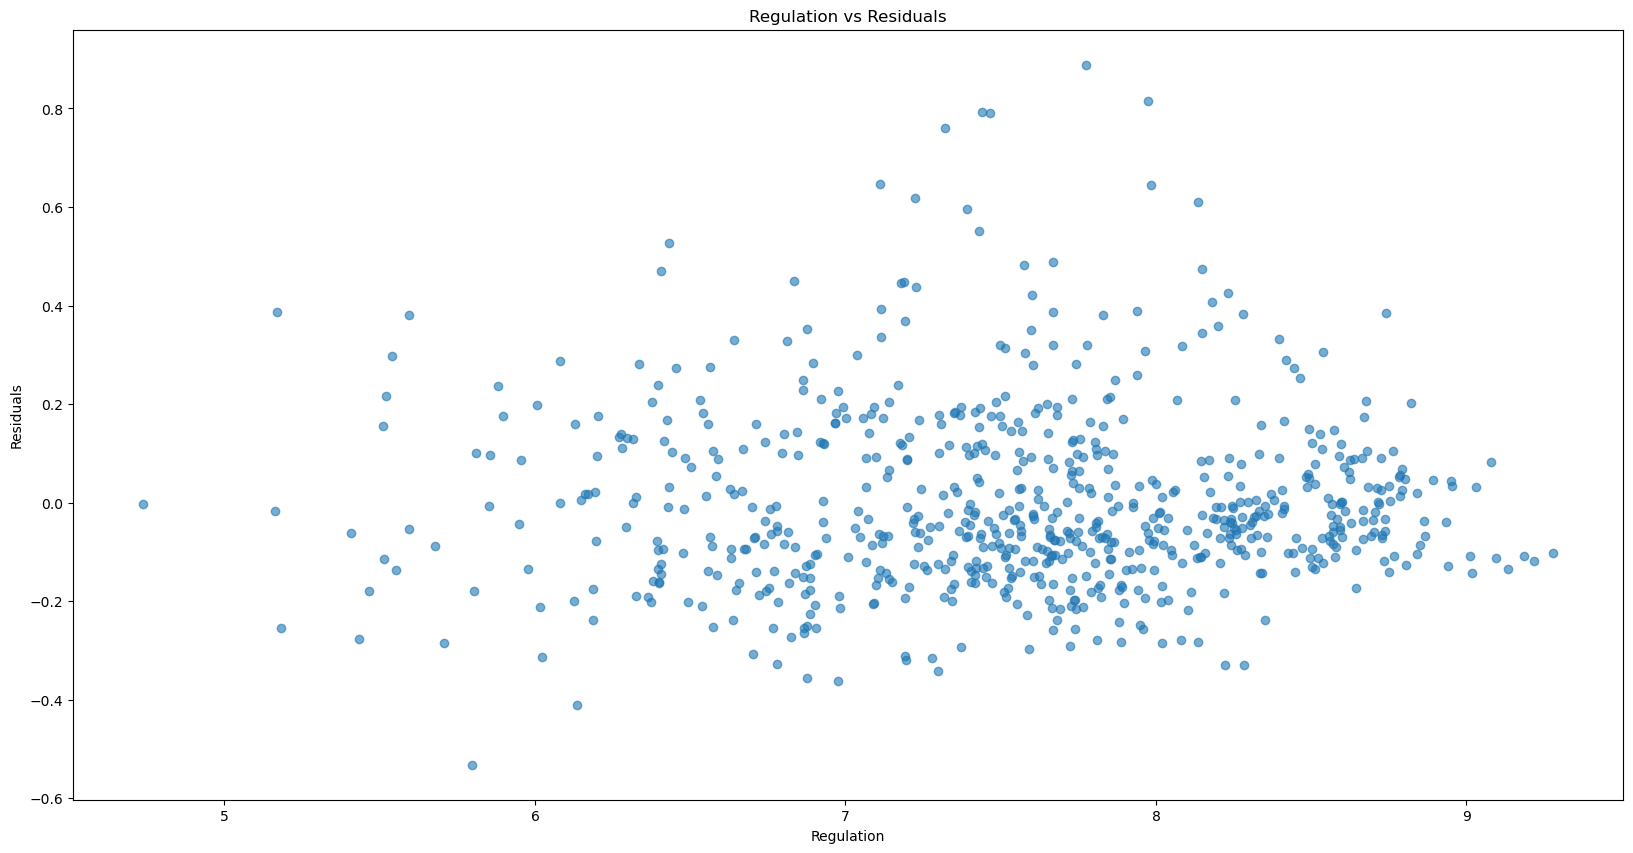

In [36]:
residuals = results.resid
for var in x_vars:
    fig, ax = plt.subplots(figsize=(20, 10))
    plt.scatter(X[var], residuals, alpha = 0.6)
    plt.xlabel(var)
    plt.ylabel('Residuals')
    plt.title(f'{var} vs Residuals')
    plt.show()

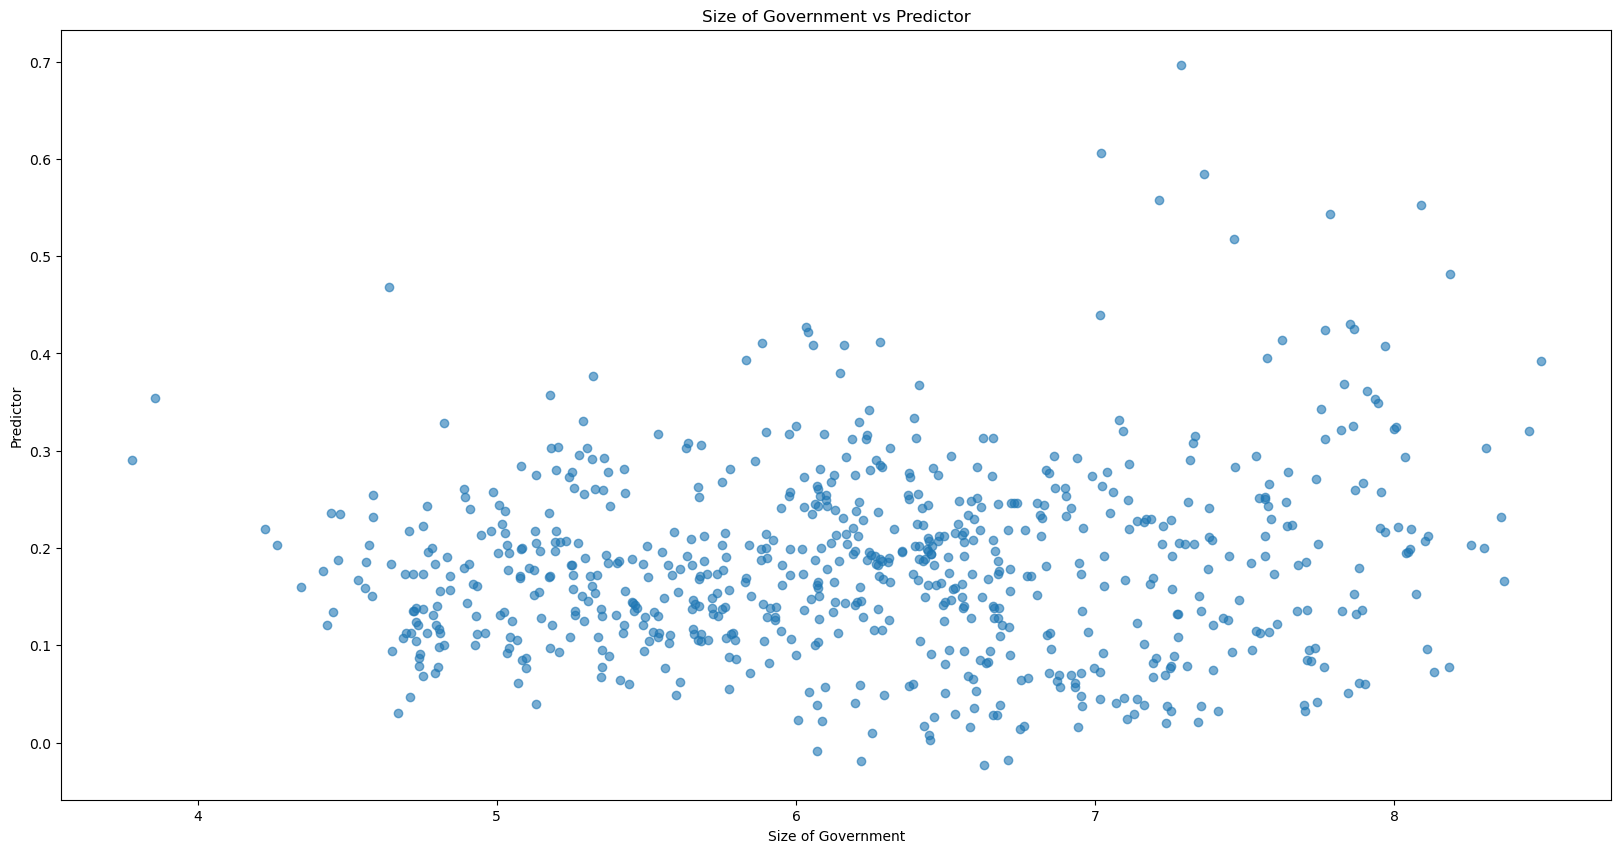

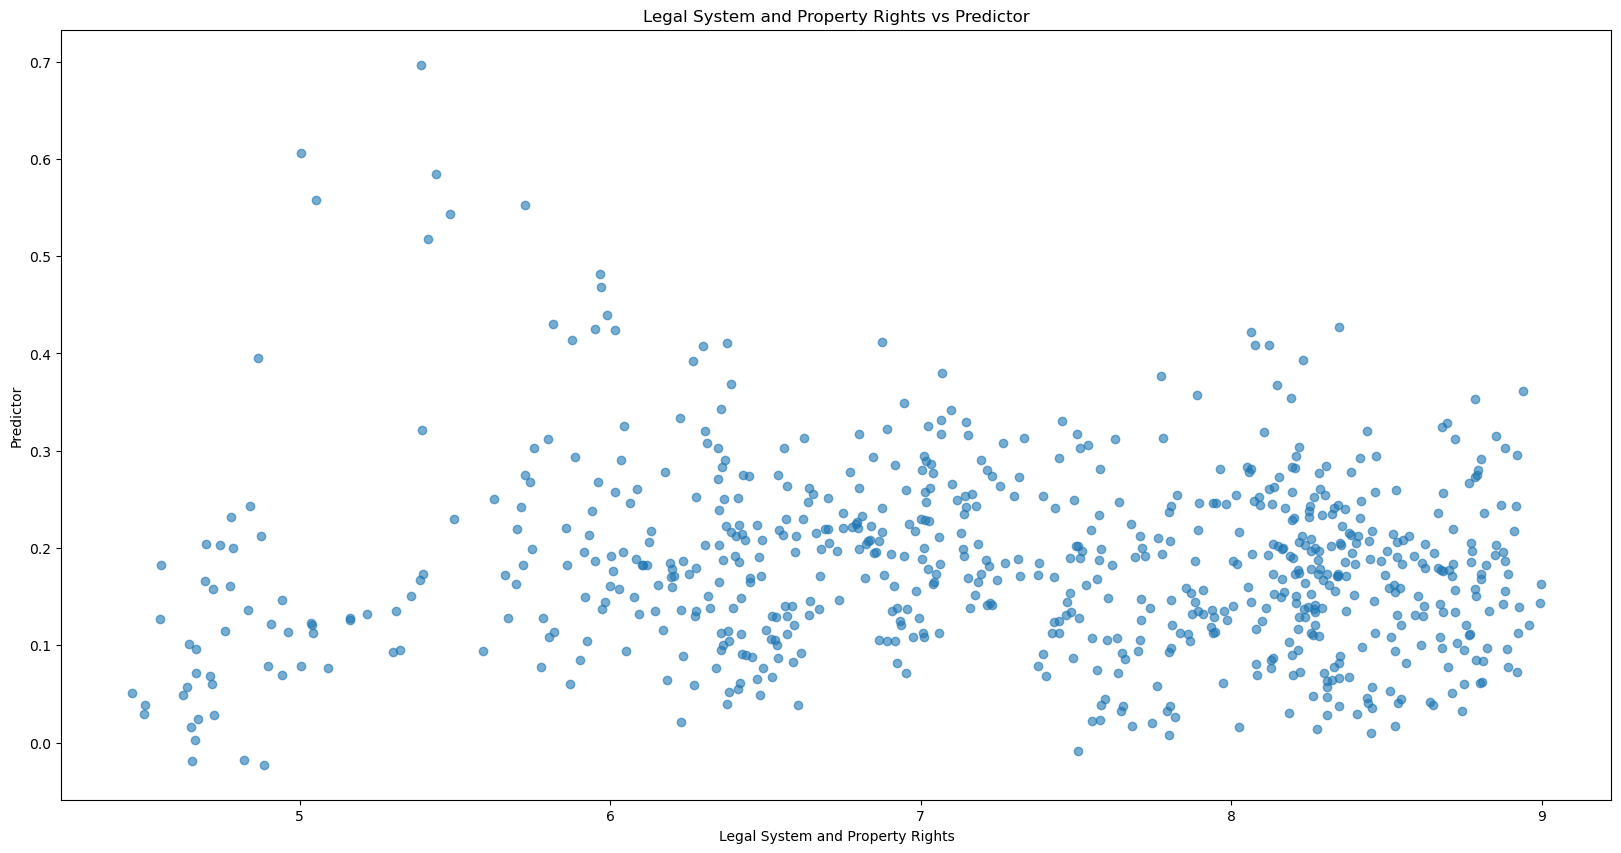

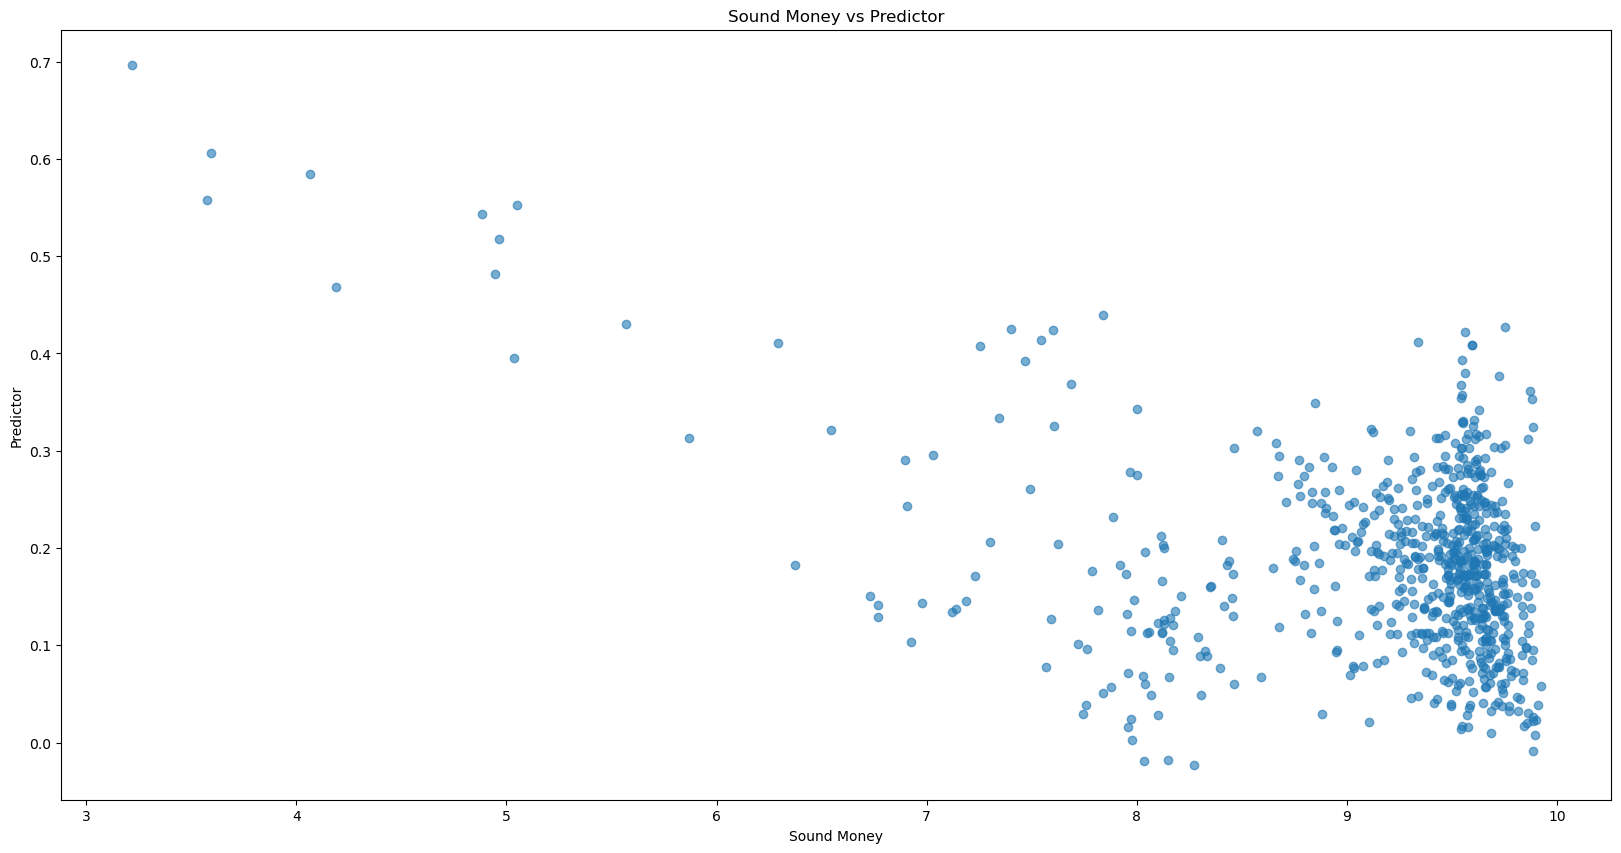

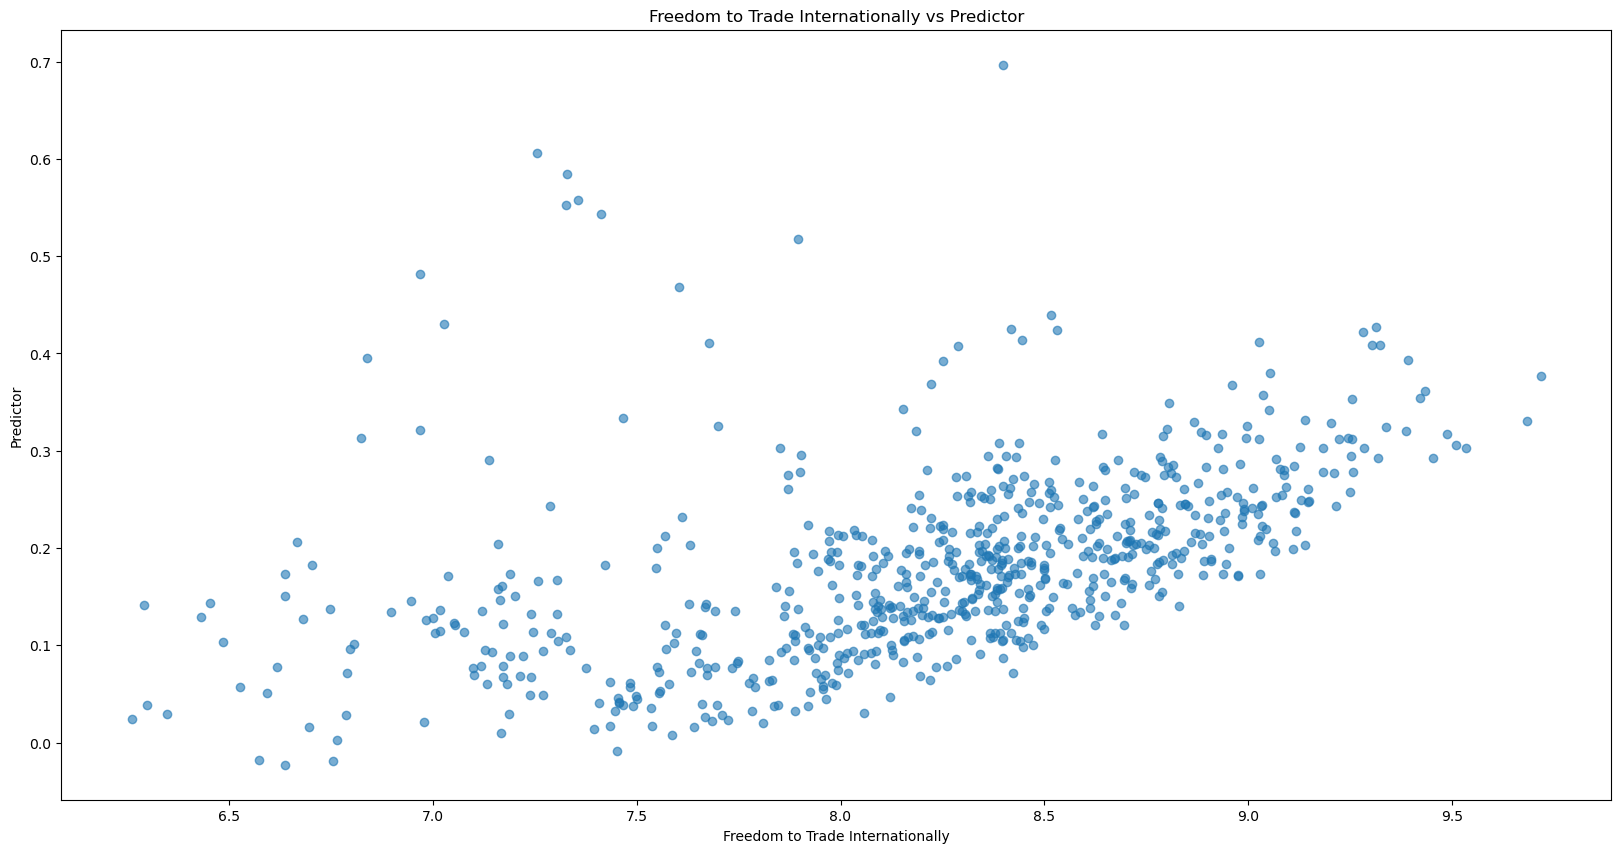

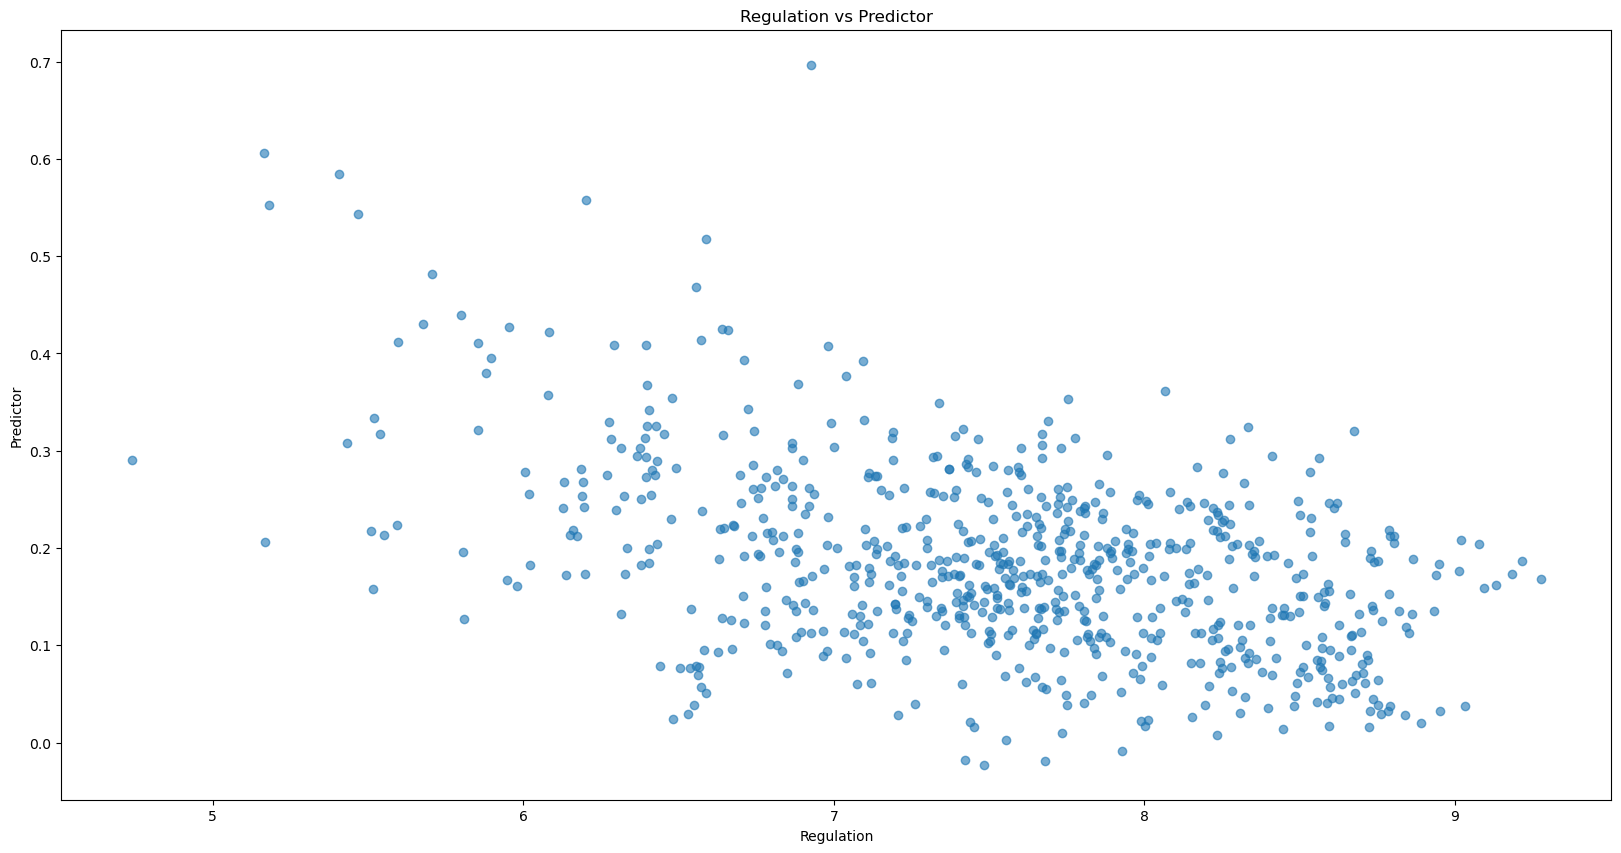

In [37]:
for var in x_vars:
    fig, ax = plt.subplots(figsize=(20, 10))
    plt.scatter(r_df[var], r_df["Predictor"], alpha = 0.6)
    plt.title(f"{var} vs Predictor")
    plt.xlabel(var)
    plt.ylabel("Predictor")
    plt.show()

 There is a slight bias in the residuals as the histogram demonstrates it is right-skewed. This matters because it could lead to incorrect conclusions. For example, if two factors like the Legal System and Property Rights and Freedom to Trade Internationally are correlated and the RGDP changes, we technically do not know which variable to attribute the change to.  

## 4.

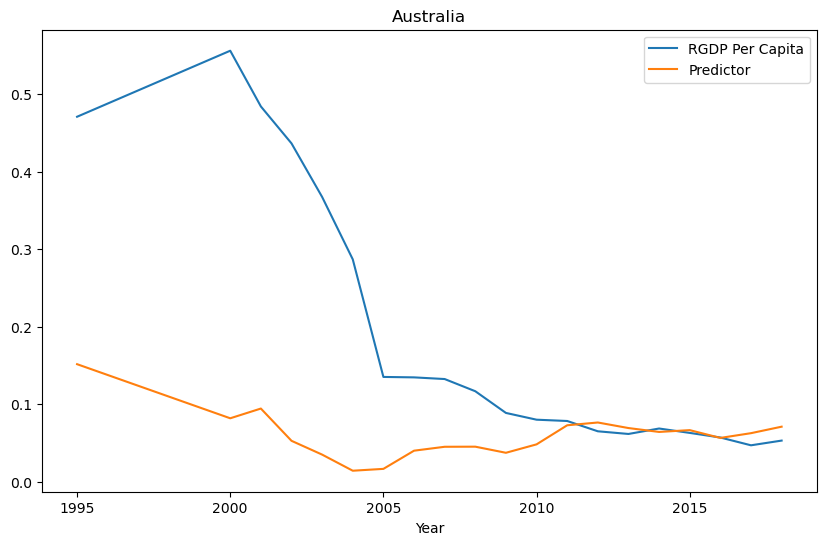

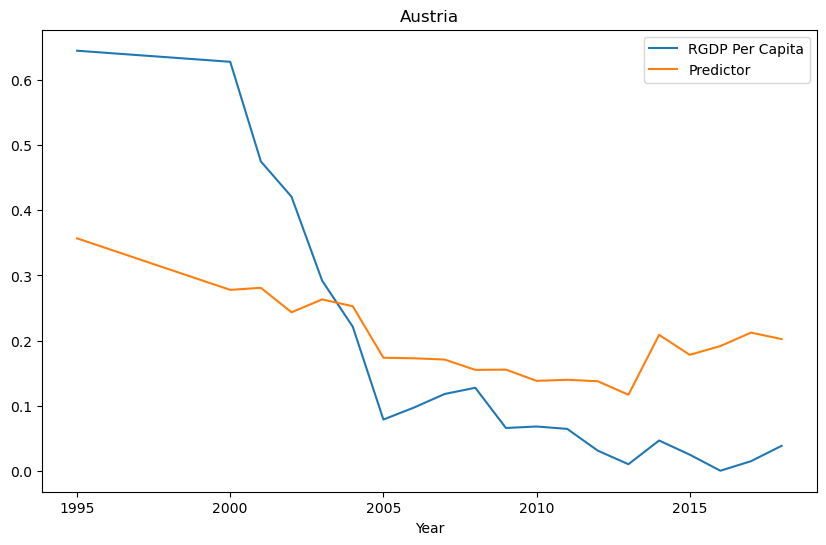

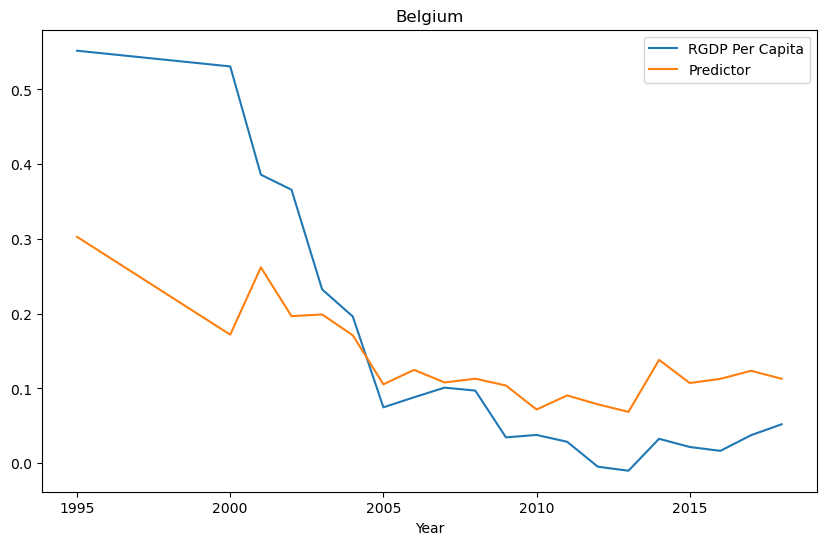

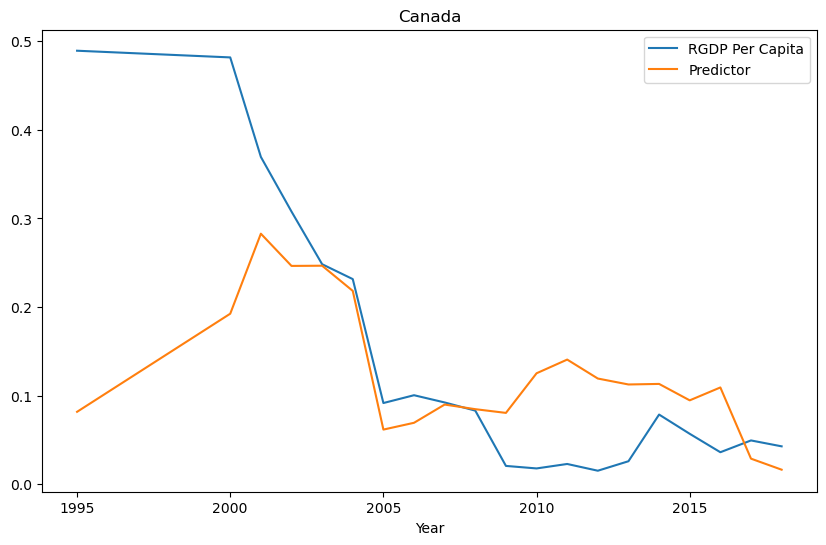

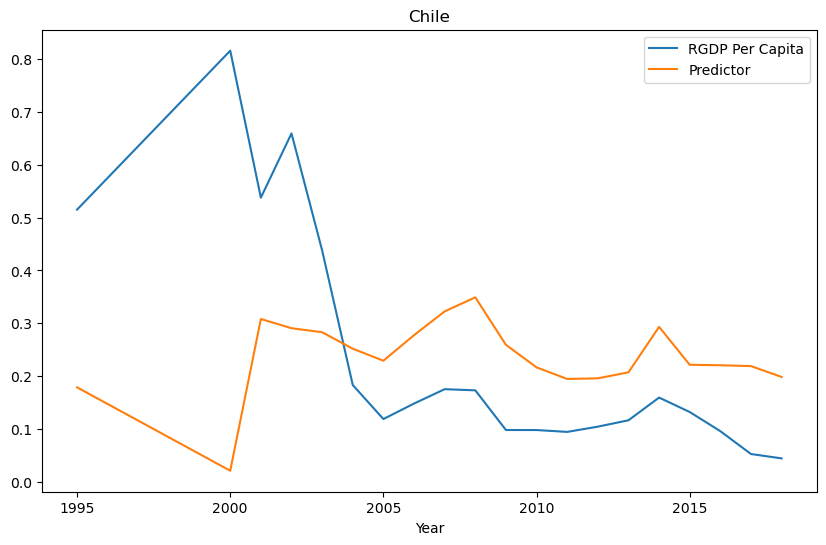

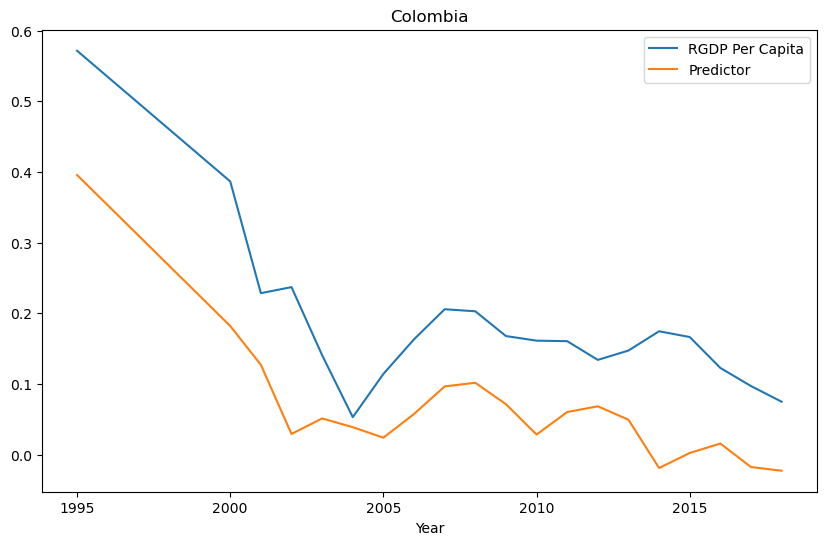

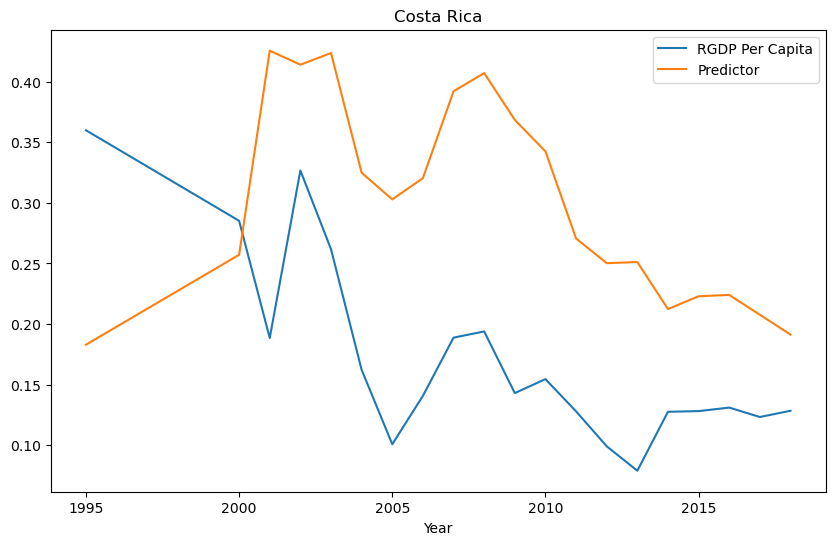

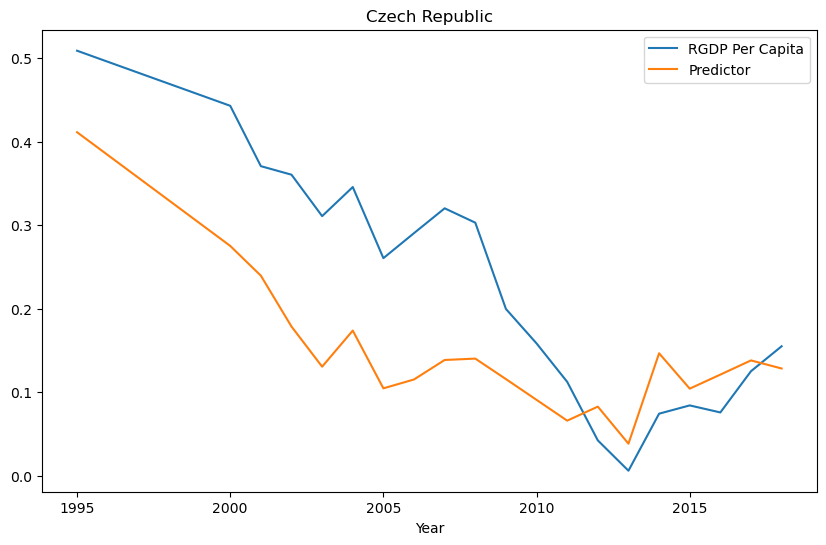

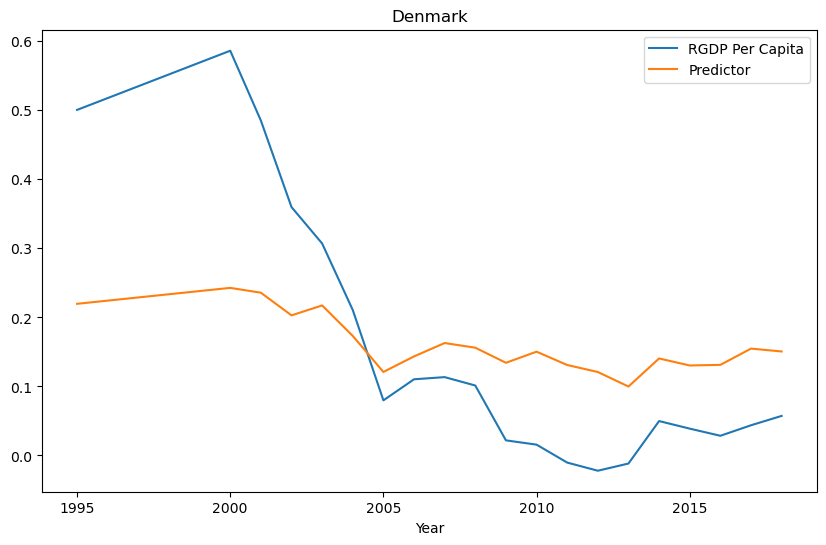

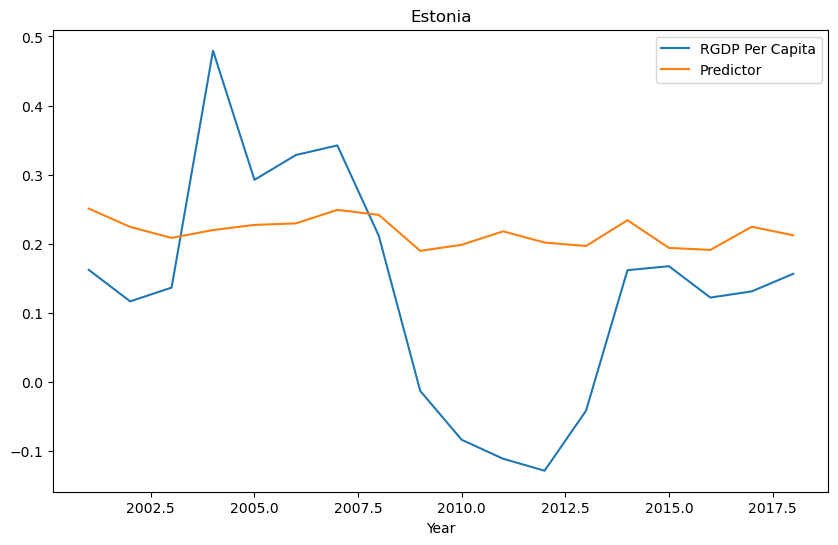

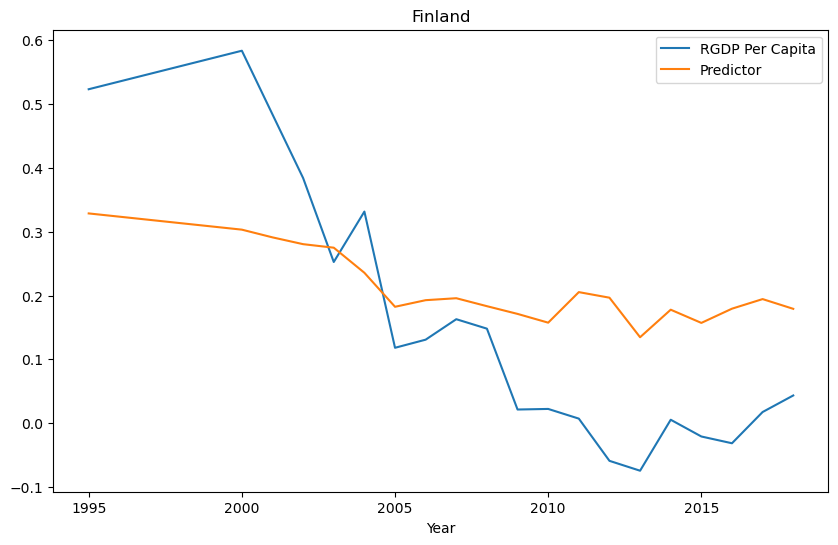

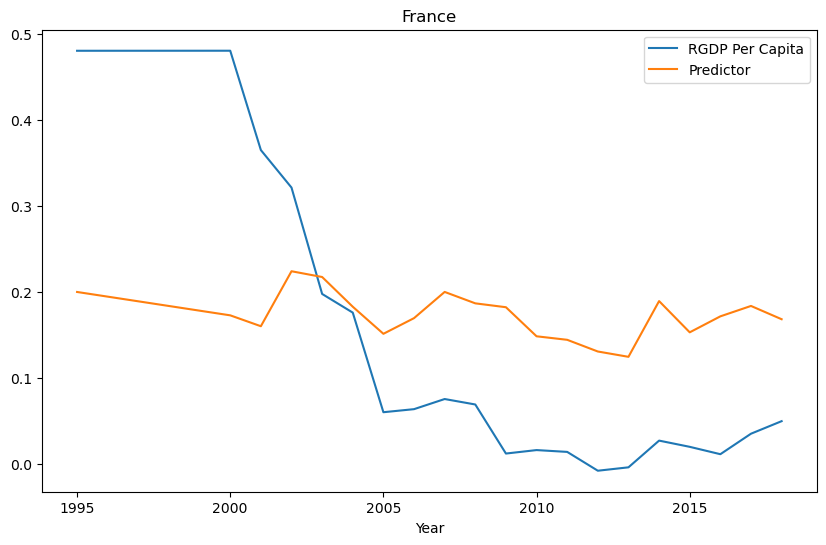

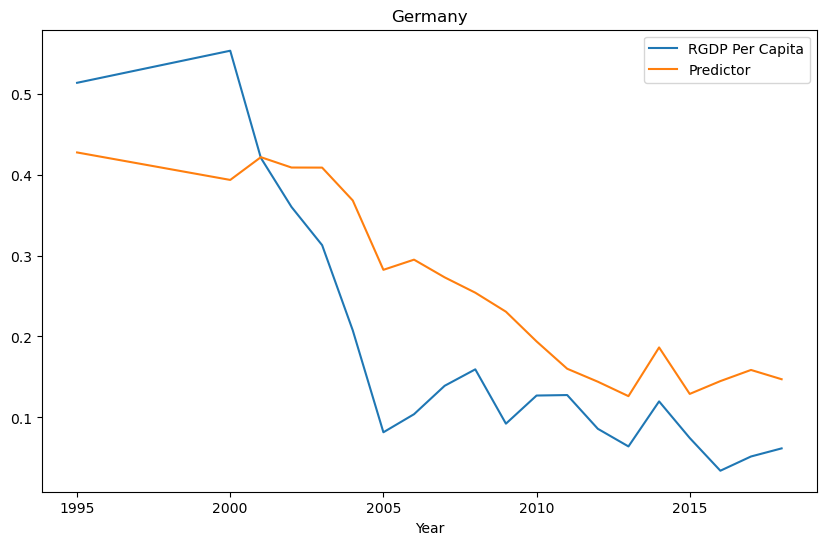

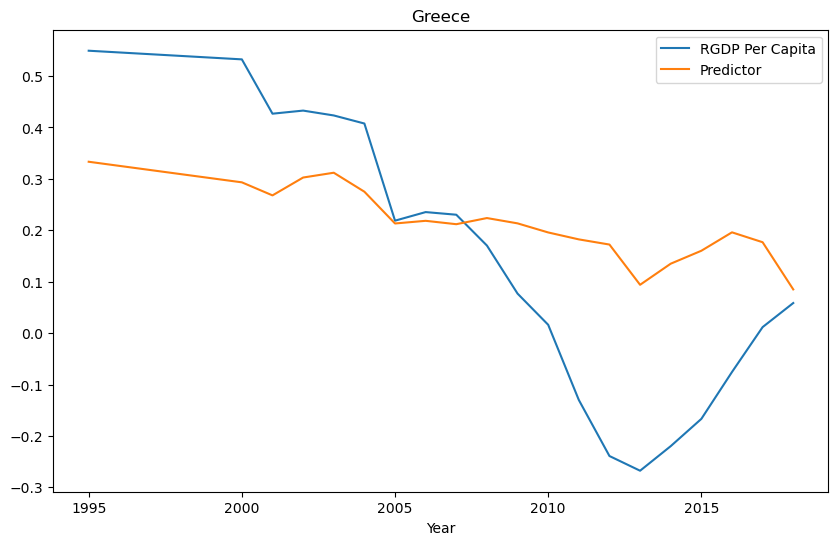

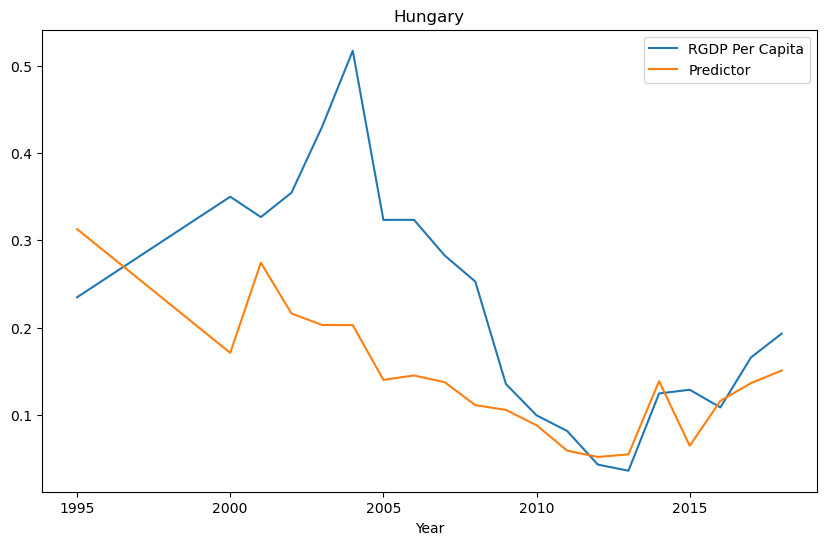

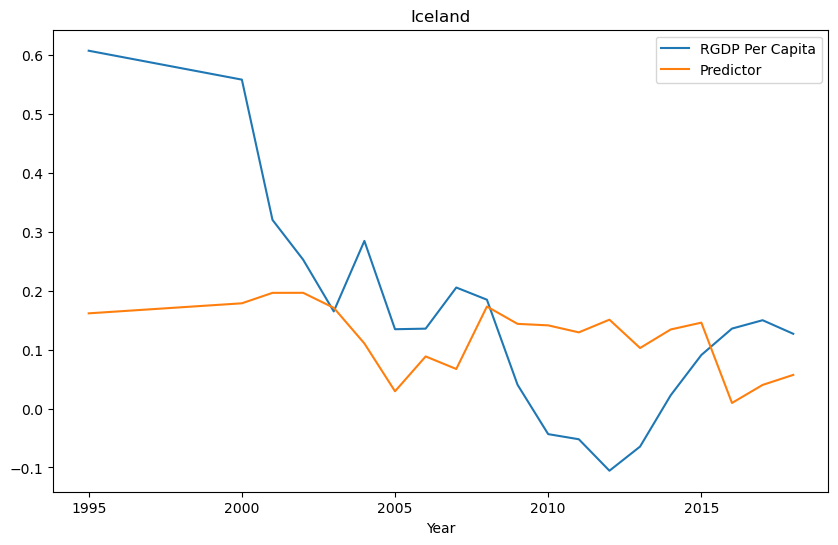

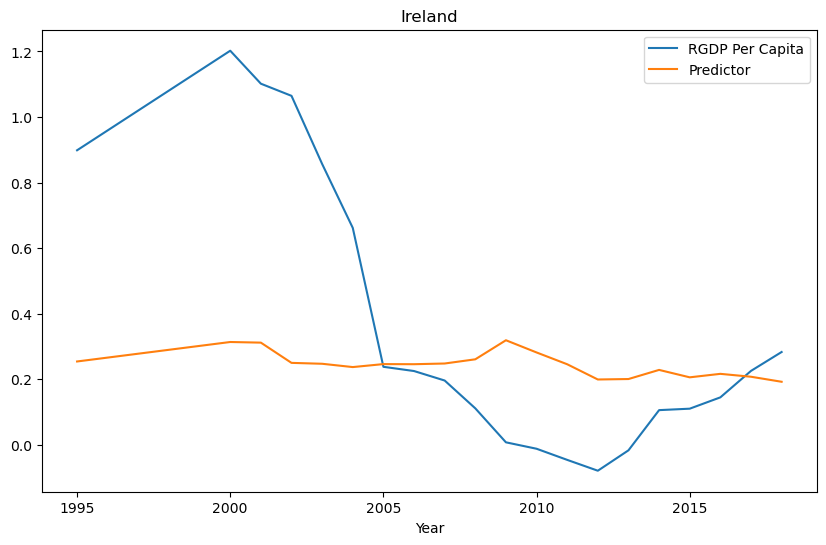

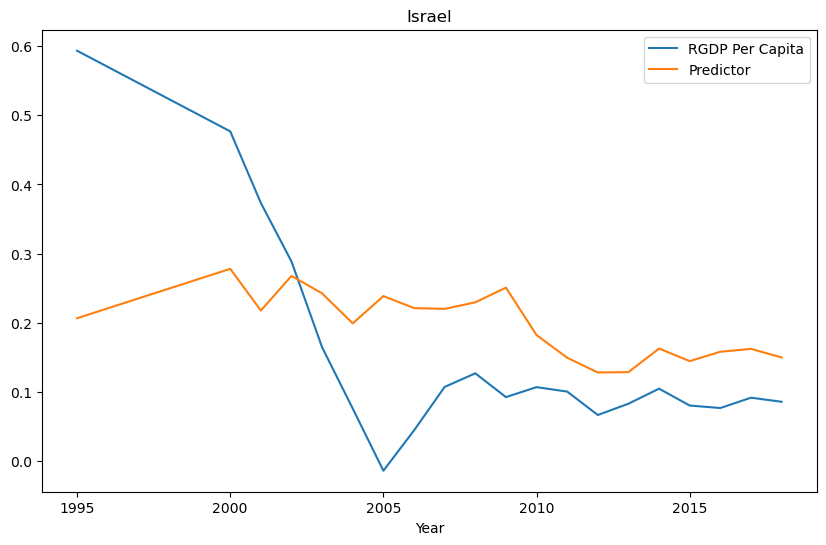

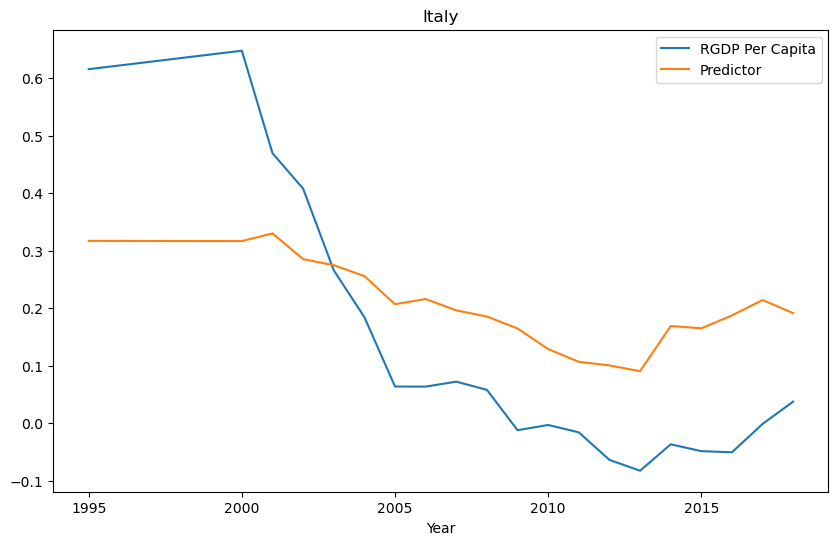

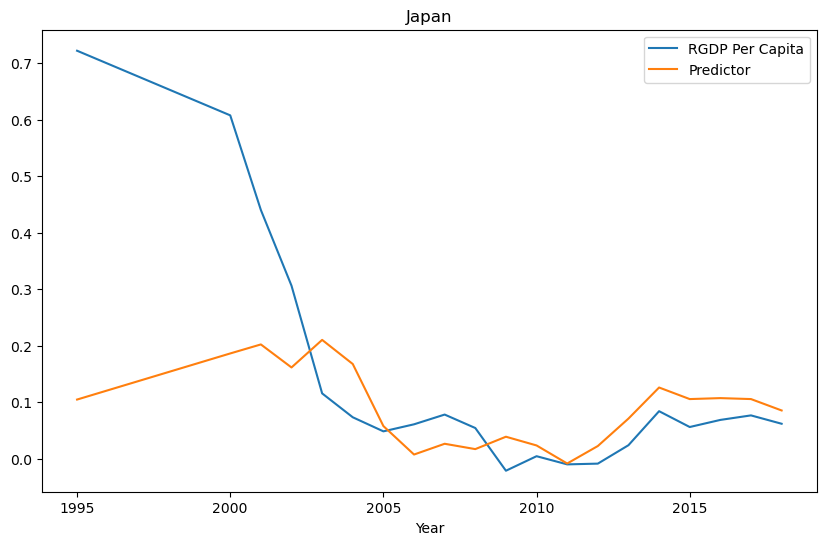

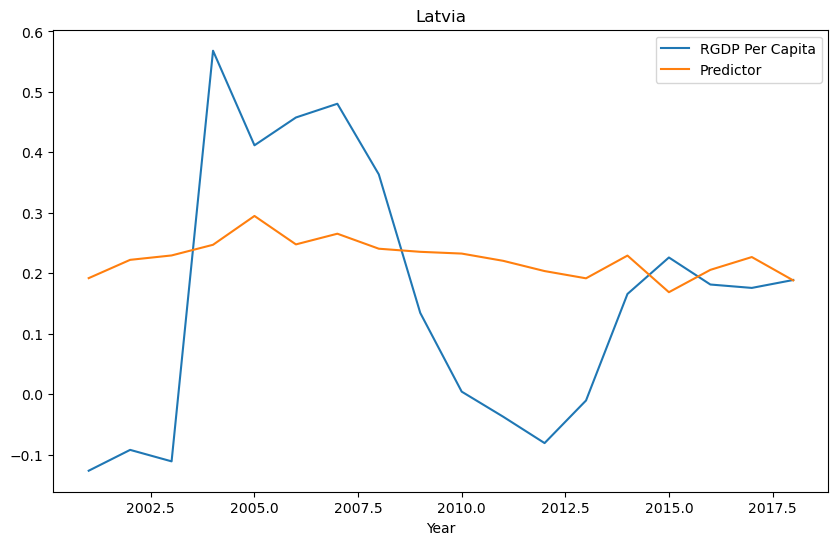

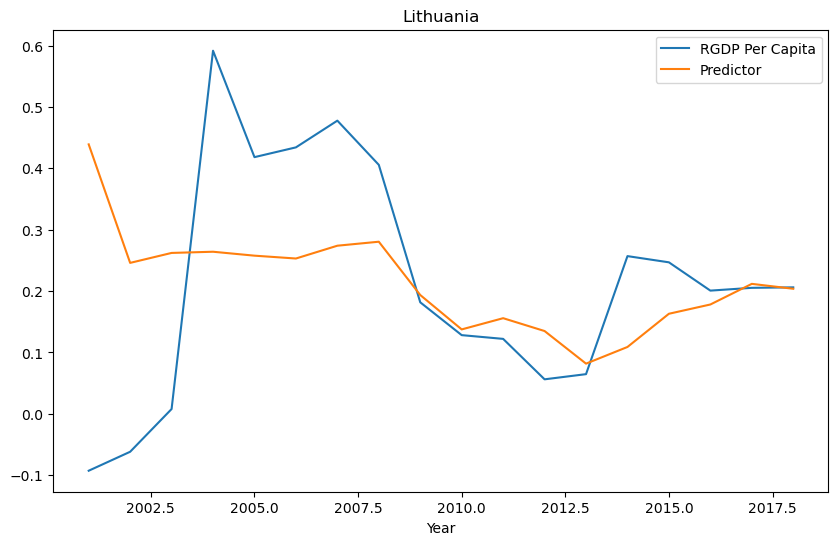

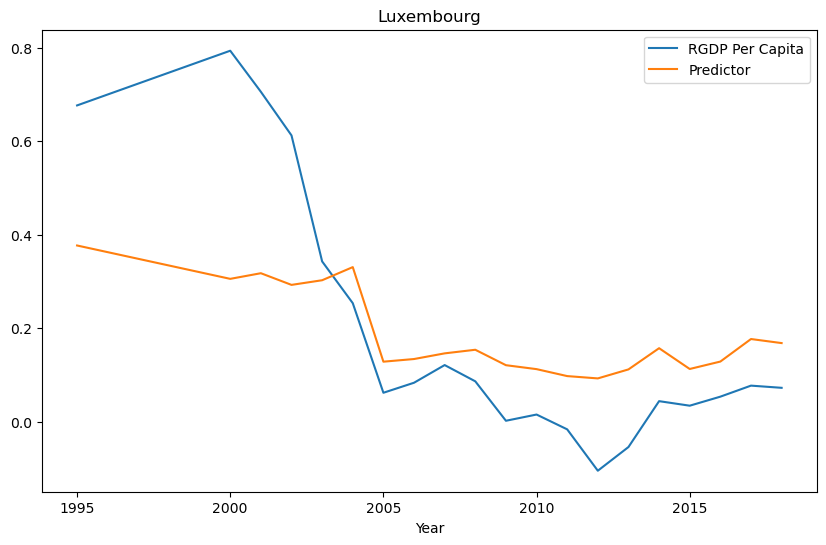

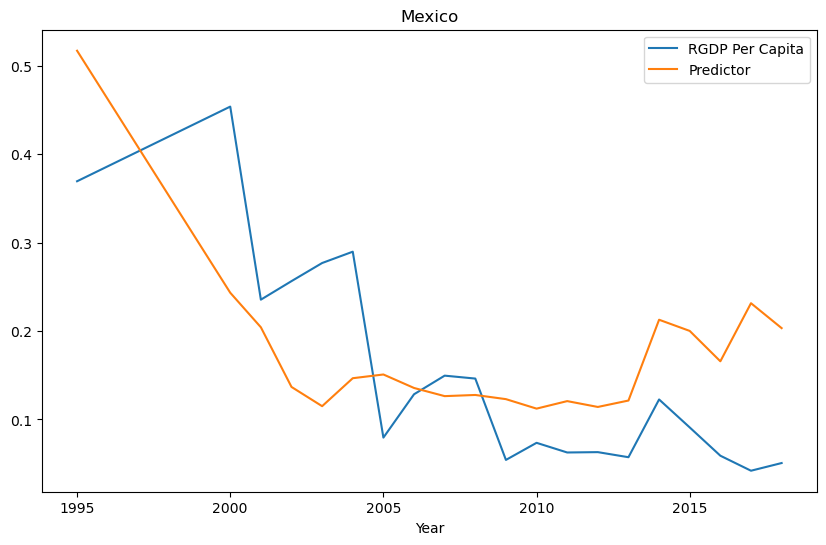

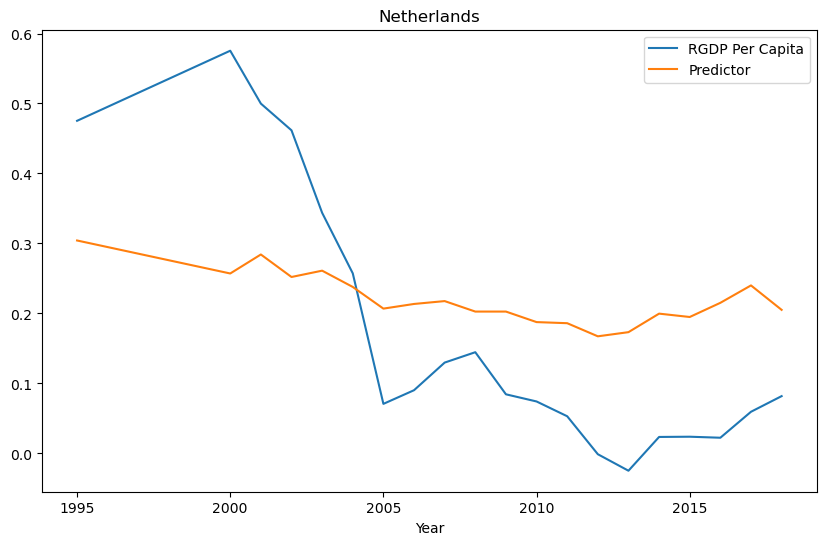

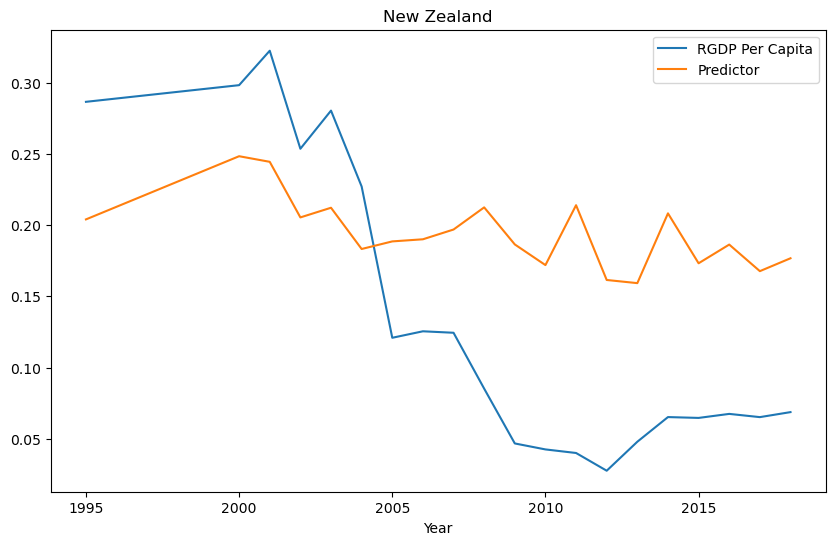

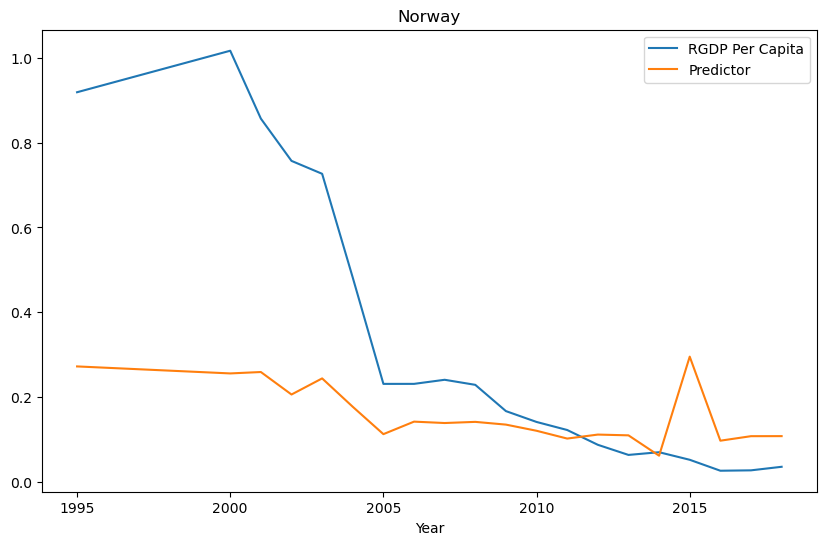

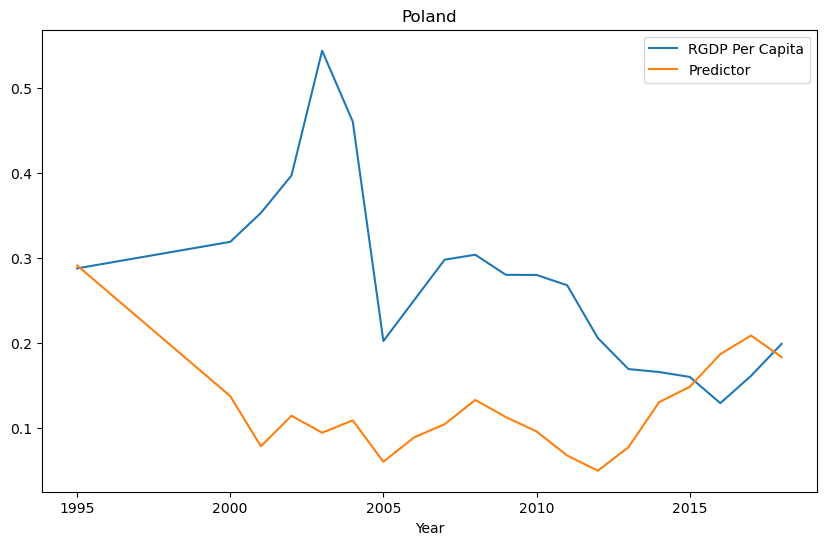

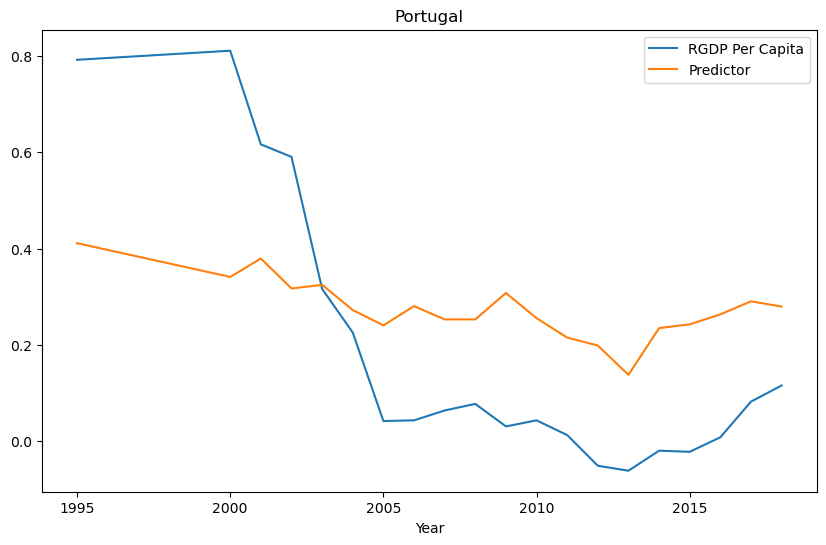

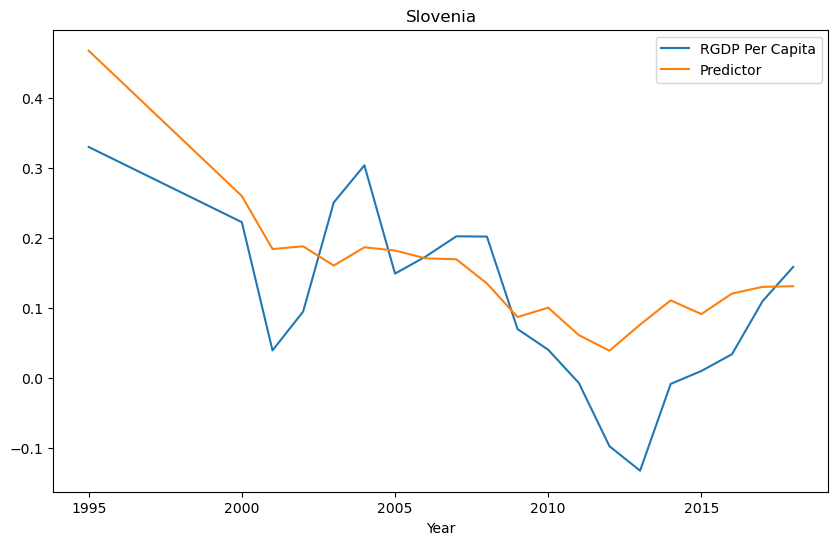

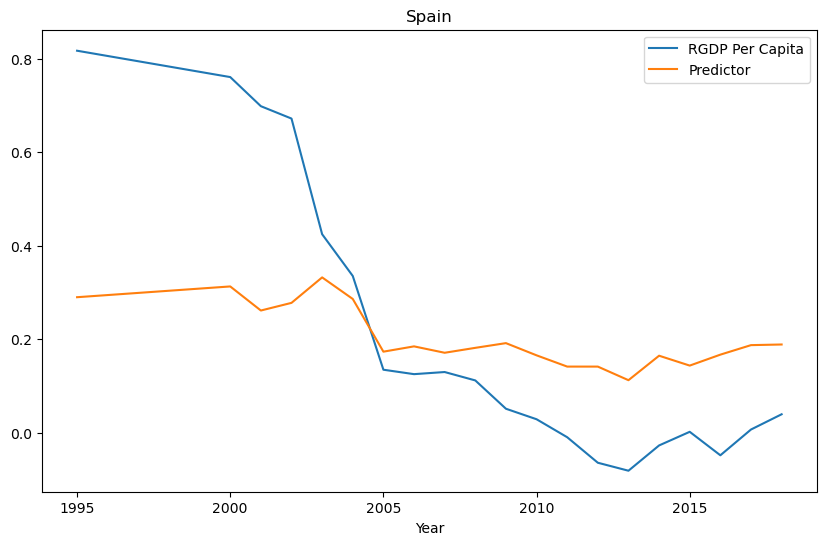

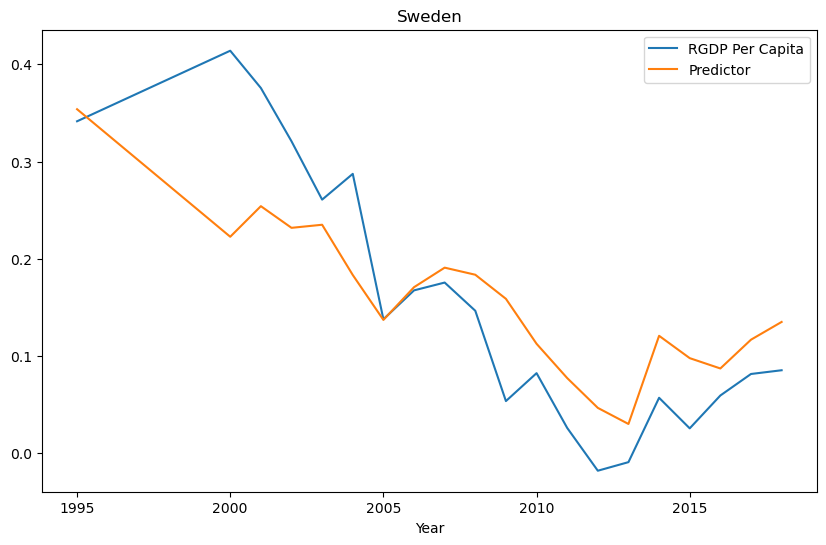

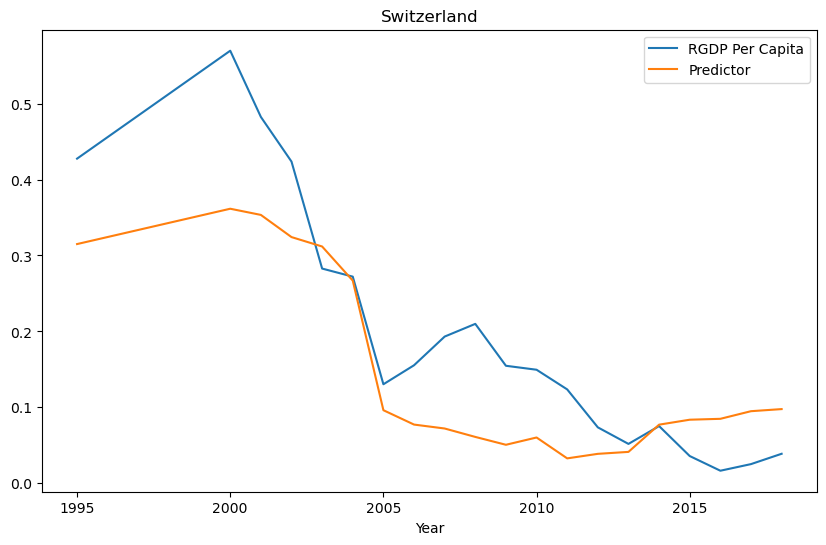

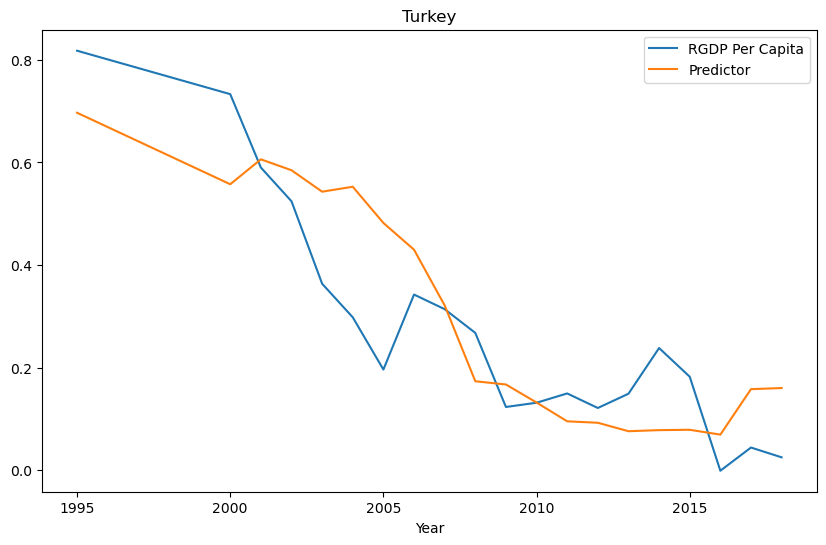

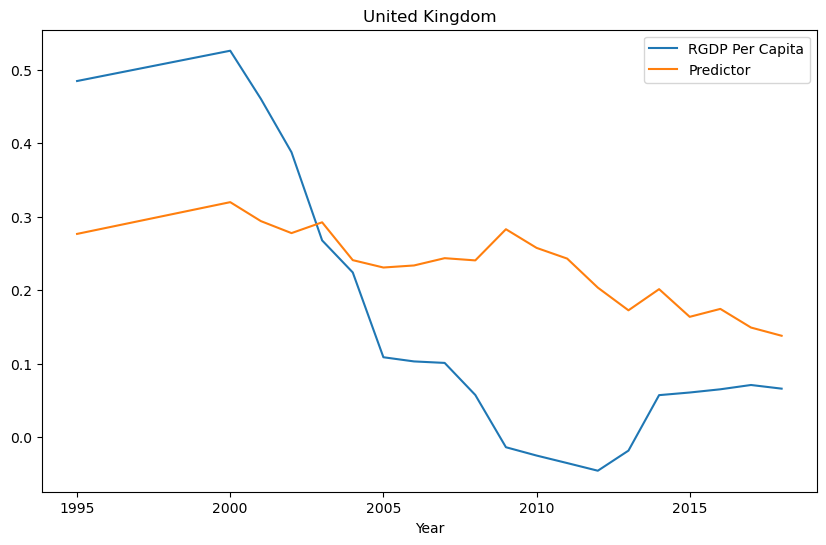

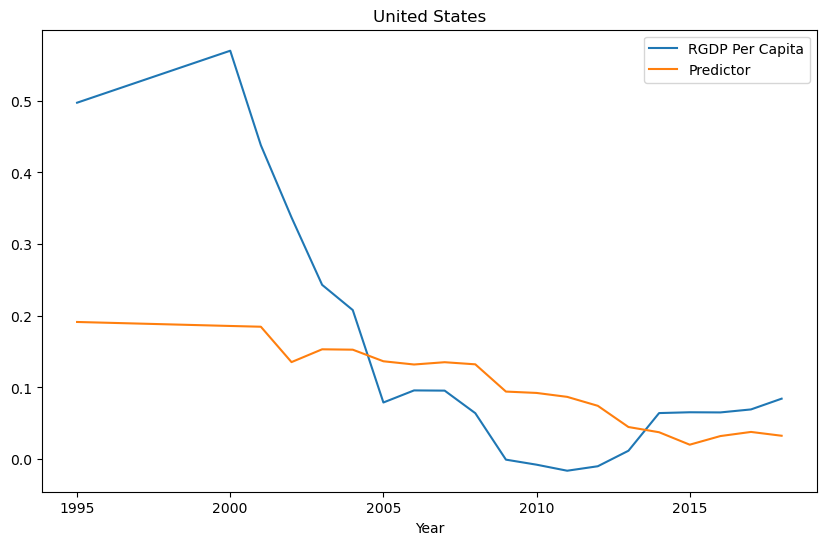

In [48]:
if 'Year' not in r_df.columns:
    r_df = r_df.reset_index(level='Year', drop=False)
grouped = r_df.groupby('Countries')

for country, group in grouped:
    fig, ax = plt.subplots(figsize=(10, 6))
    group.plot(x='Year', y=['RGDP Per Capita', 'Predictor'], ax=ax, legend=True)
    ax.set_title(country)
    plt.show()

## 5.

In [73]:
years_diff = 2
reg_data = oecd_data[x_vars + y_var]
log_data = np.log(reg_data)
reg_data["RGDP Per Capita"] = log_data.groupby("Countries")[
    "RGDP Per Capita"].diff(years_diff)
reg_data["RGDP Per Capita Lag"] = log_data.groupby("Countries")[
    "RGDP Per Capita"].diff(years_diff).shift(2)
r_df = reg_data.dropna(axis = 0, how = "any")
y = r_df[y_var]
X = r_df[x_vars + ["RGDP Per Capita Lag"]]
X["Constant"] = 1
results = sm.OLS(y, X).fit()
r_df
#reg_data = reg_data[reg_data.index.get_level_values("Year") % 5 == 0]

r_df["Predictor"] = results.predict()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        RGDP Per Capita   R-squared:                       0.155
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     22.73
Date:                Mon, 06 May 2024   Prob (F-statistic):           1.12e-24
Time:                        20:24:44   Log-Likelihood:                 723.82
No. Observations:                 748   AIC:                            -1434.
Df Residuals:                     741   BIC:                            -1401.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Size of 

C:\Users\aleah\AppData\Local\Temp\ipykernel_21824\1565829751.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reg_data["RGDP Per Capita"] = log_data.groupby("Countries")[
C:\Users\aleah\AppData\Local\Temp\ipykernel_21824\1565829751.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reg_data["RGDP Per Capita Lag"] = log_data.groupby("Countries")[
C:\Users\aleah\AppData\Local\Temp\ipykernel_21824\1565829751.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.


In [67]:
np.log(r_df).diff(1).groupby("Countries").mean().corr()

C:\Users\aleah\anaconda3\Lib\site-packages\pandas\core\internals\blocks.py:351: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


Size of Government  \
Size of Government                          1.000000   
Legal System and Property Rights           -0.265018   
Sound Money                                -0.100953   
Freedom to Trade Internationally           -0.054374   
Regulation                                 -0.084349   
RGDP Per Capita                            -0.116342   
RGDP Per Capita Lag                        -0.015188   
Residuals                                  -0.048890   

                                  Legal System and Property Rights  \
Size of Government                                       -0.265018   
Legal System and Property Rights                          1.000000   
Sound Money                                               0.821437   
Freedom to Trade Internationally                          0.543195   
Regulation                                                0.643363   
RGDP Per Capita                                           0.254079   
RGDP Per Capita Lag                                       0.190448   
Residuals                                                 0.429754   

                                  Sound Money  \
Size of Government                  -0.100953   
Legal System and Property Rights     0.821437   
Sound Money                          1.000000   
Freedom to Trade Internationally     0.701326   
Regulation                           0.506289   
RGDP Per Capita                      0.140219   
RGDP Per Capita Lag                  0.054414   
Residuals                            0.367227   

                                  Freedom to Trade Internationally  \
Size of Government                                       -0.054374   
Legal System and Property Rights                          0.543195   
Sound Money                                               0.701326   
Freedom to Trade Internationally                          1.000000   
Regulation                                                0.365600   
RGDP Per Capita                                          -0.069063   
RGDP Per Capita Lag                                      -0.122706   
Residuals                                                 0.152104   

                                  Regulation  RGDP Per Capita  \
Size of Government                 -0.084349        -0.116342   
Legal System and Property Rights    0.643363         0.254079   
Sound Money                         0.506289         0.140219   
Freedom to Trade Internationally    0.365600        -0.069063   
Regulation                          1.000000         0.098193   
RGDP Per Capita                     0.098193         1.000000   
RGDP Per Capita Lag                 0.046261         0.816370   
Residuals                           0.433826         0.163148   

                                  RGDP Per Capita Lag  Residuals  
Size of Government                          -0.015188  -0.048890  
Legal System and Property Rights             0.190448   0.429754  
Sound Money                                  0.054414   0.367227  
Freedom to Trade Internationally            -0.122706   0.152104  
Regulation                                   0.046261   0.433826  
RGDP Per Capita                              0.816370   0.163148  
RGDP Per Capita Lag                          1.000000   0.103000  
Residuals                                    0.103000   1.000000

C:\Users\aleah\AppData\Local\Temp\ipykernel_21824\883112934.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r_df["Residuals"] = results.resid


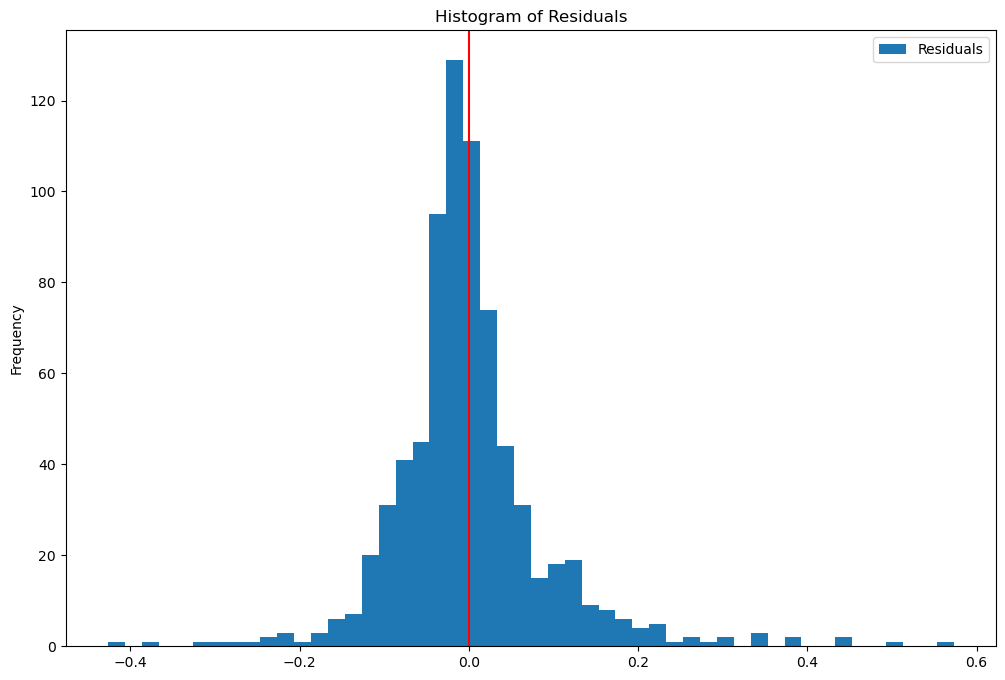

In [74]:
r_df["Residuals"] = results.resid
fig,ax = plt.subplots(figsize = (12,8))
r_df[["Residuals"]].plot.hist(bins = 50, ax = ax)
plt.title("Histogram of Residuals")
ax.axvline(0, c="r")

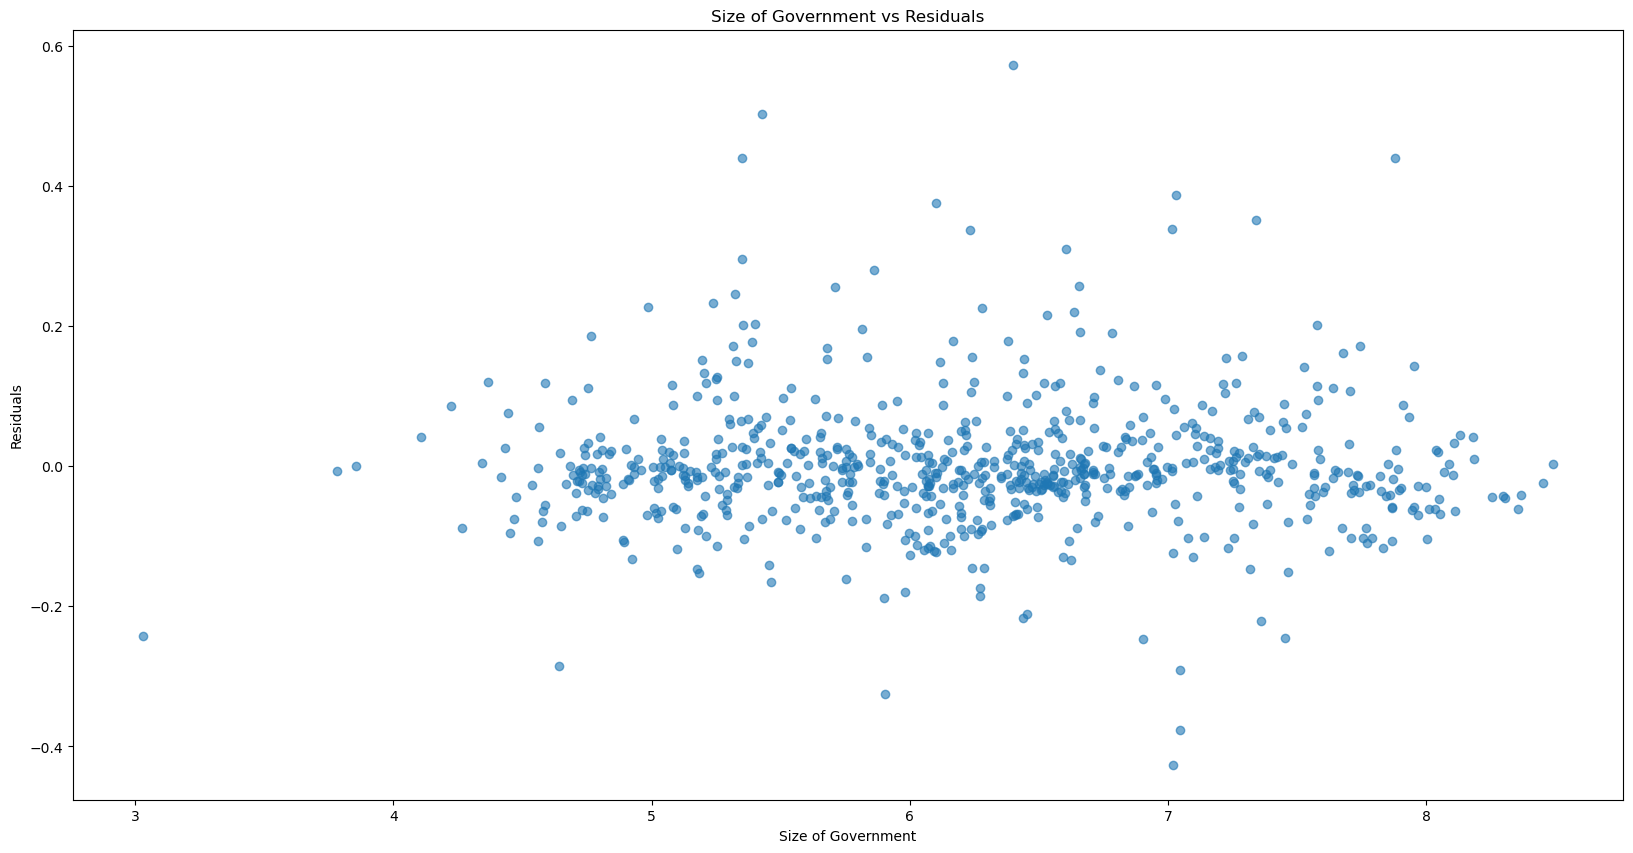

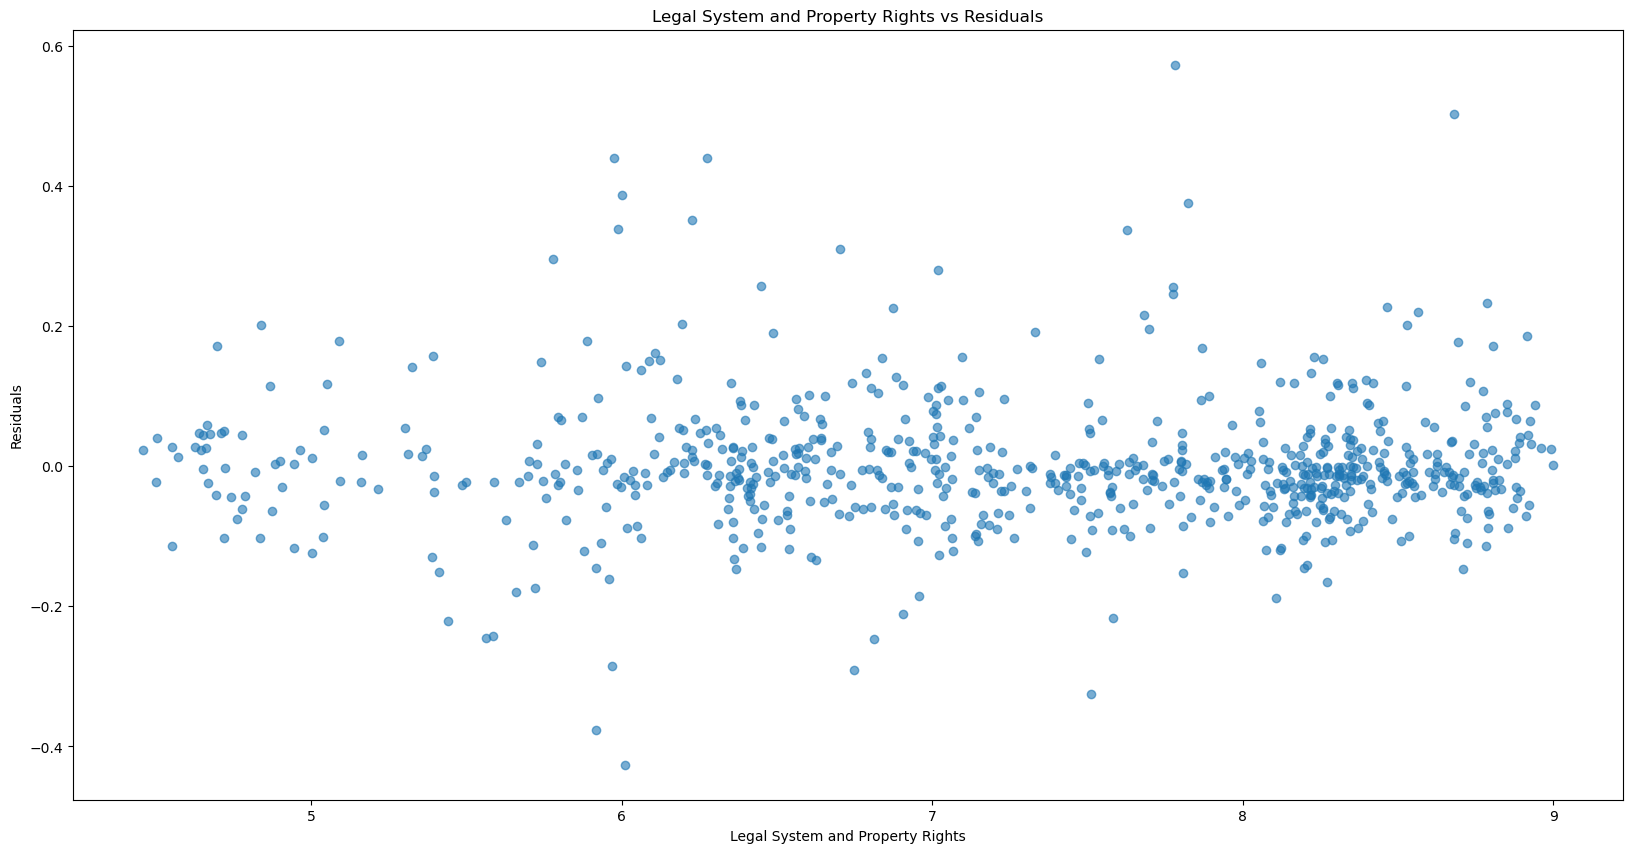

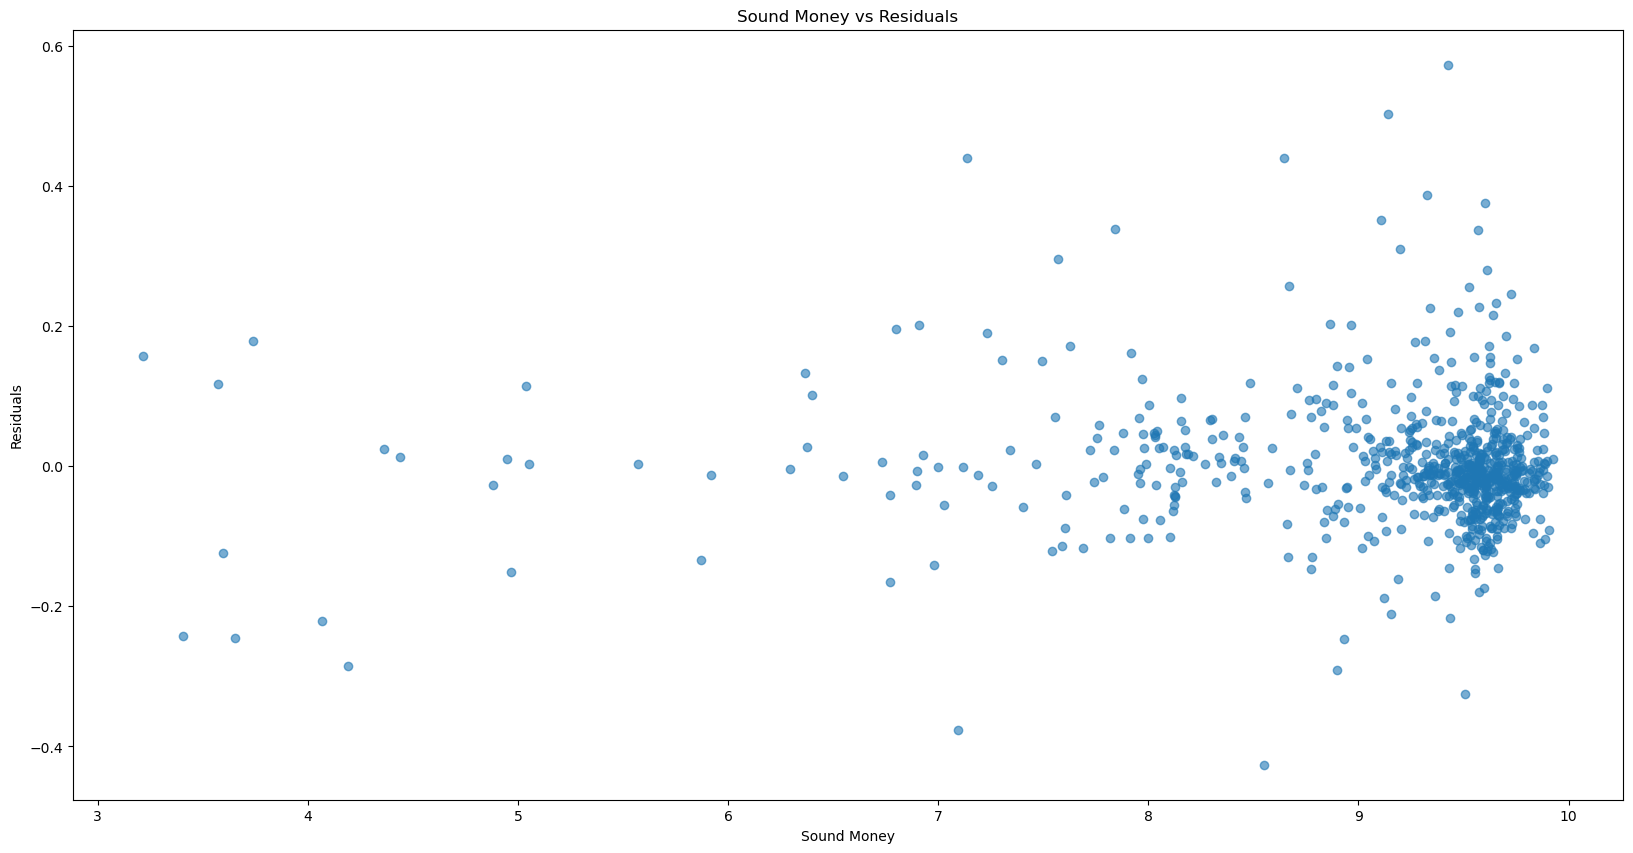

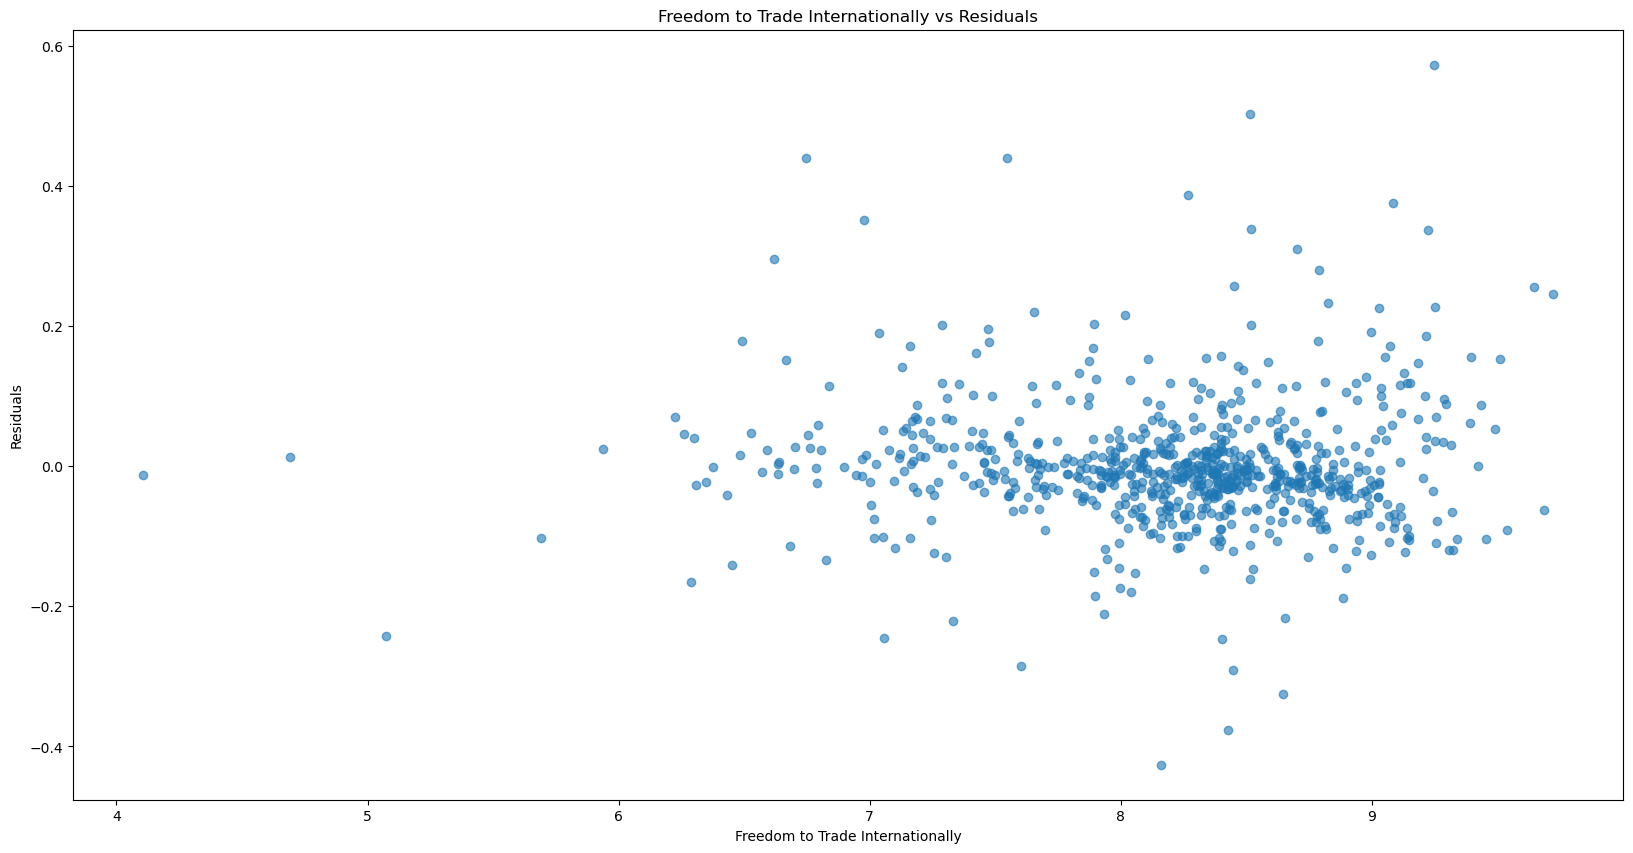

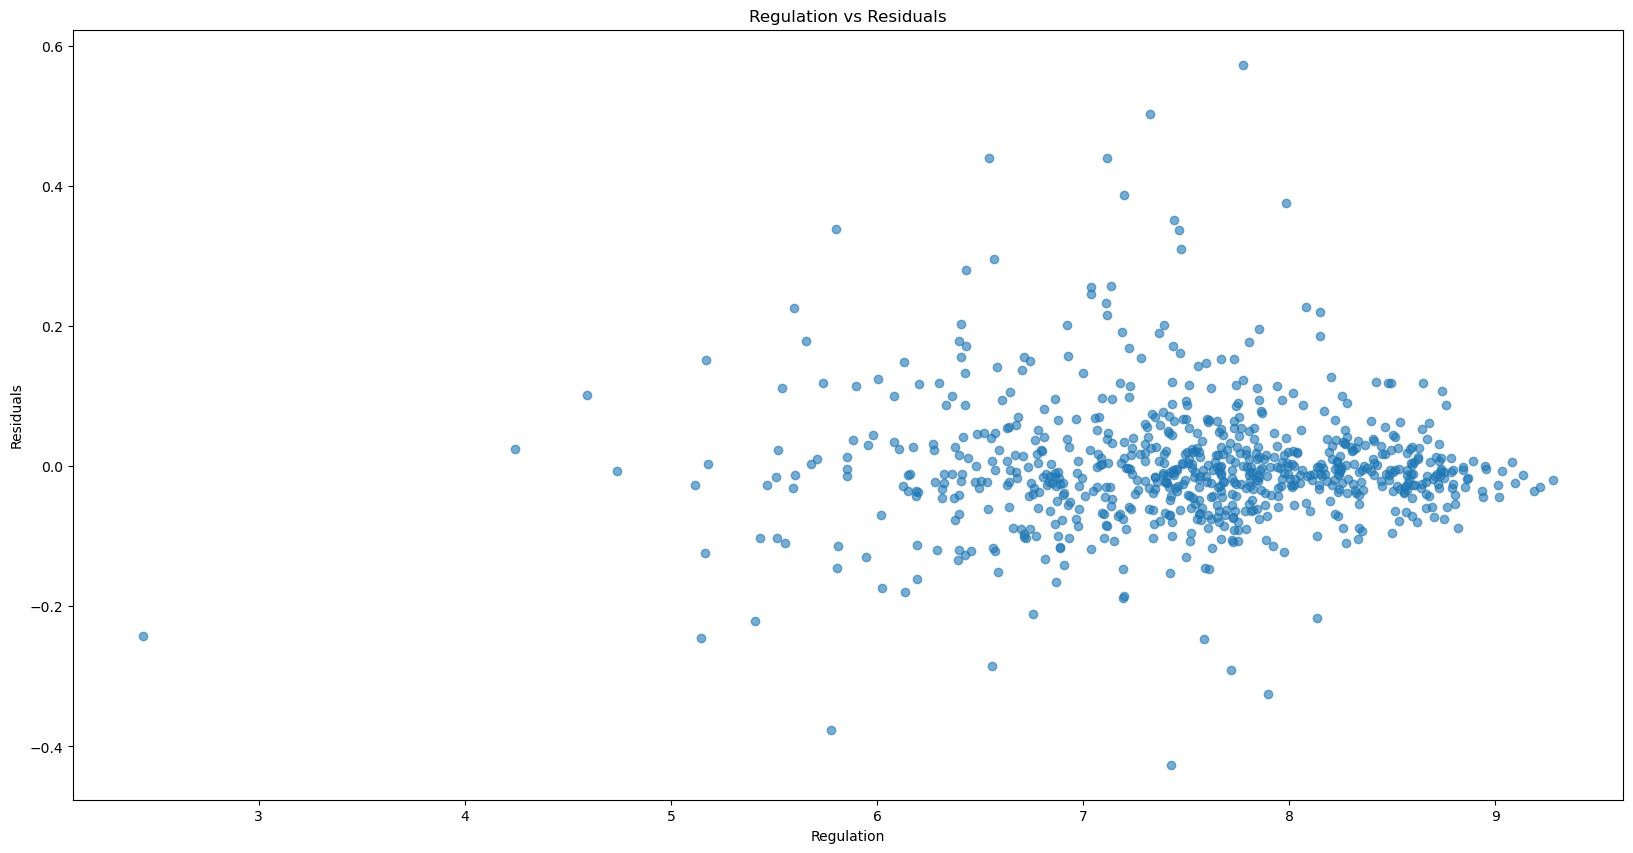

In [75]:
residuals = results.resid
for var in x_vars:
    fig, ax = plt.subplots(figsize=(20, 10))
    plt.scatter(X[var], residuals, alpha = 0.6)
    plt.xlabel(var)
    plt.ylabel('Residuals')
    plt.title(f'{var} vs Residuals')
    plt.show()

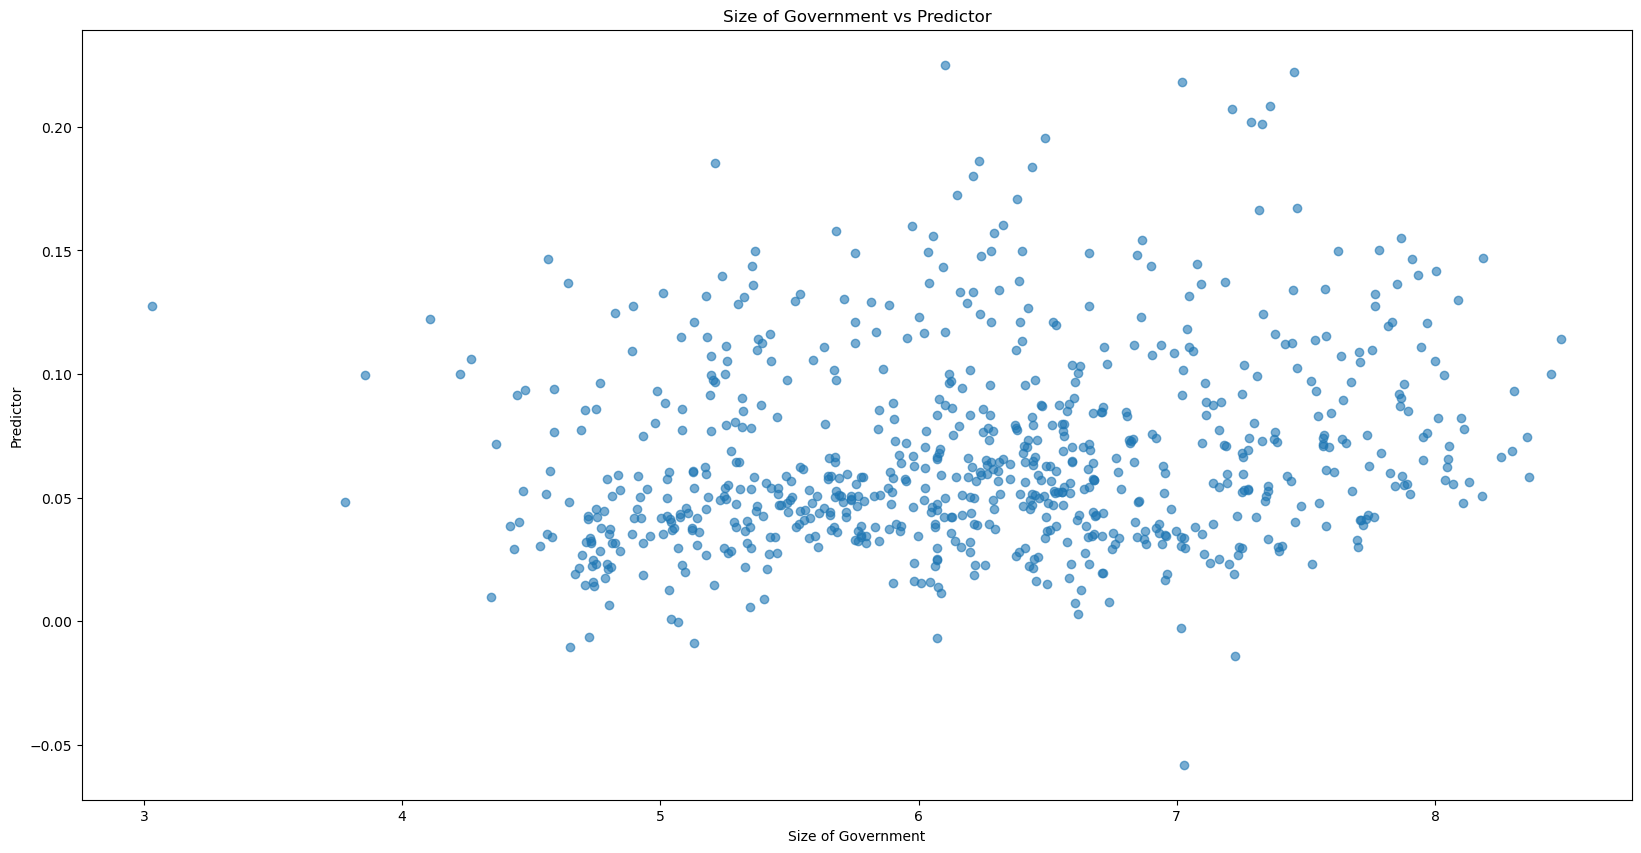

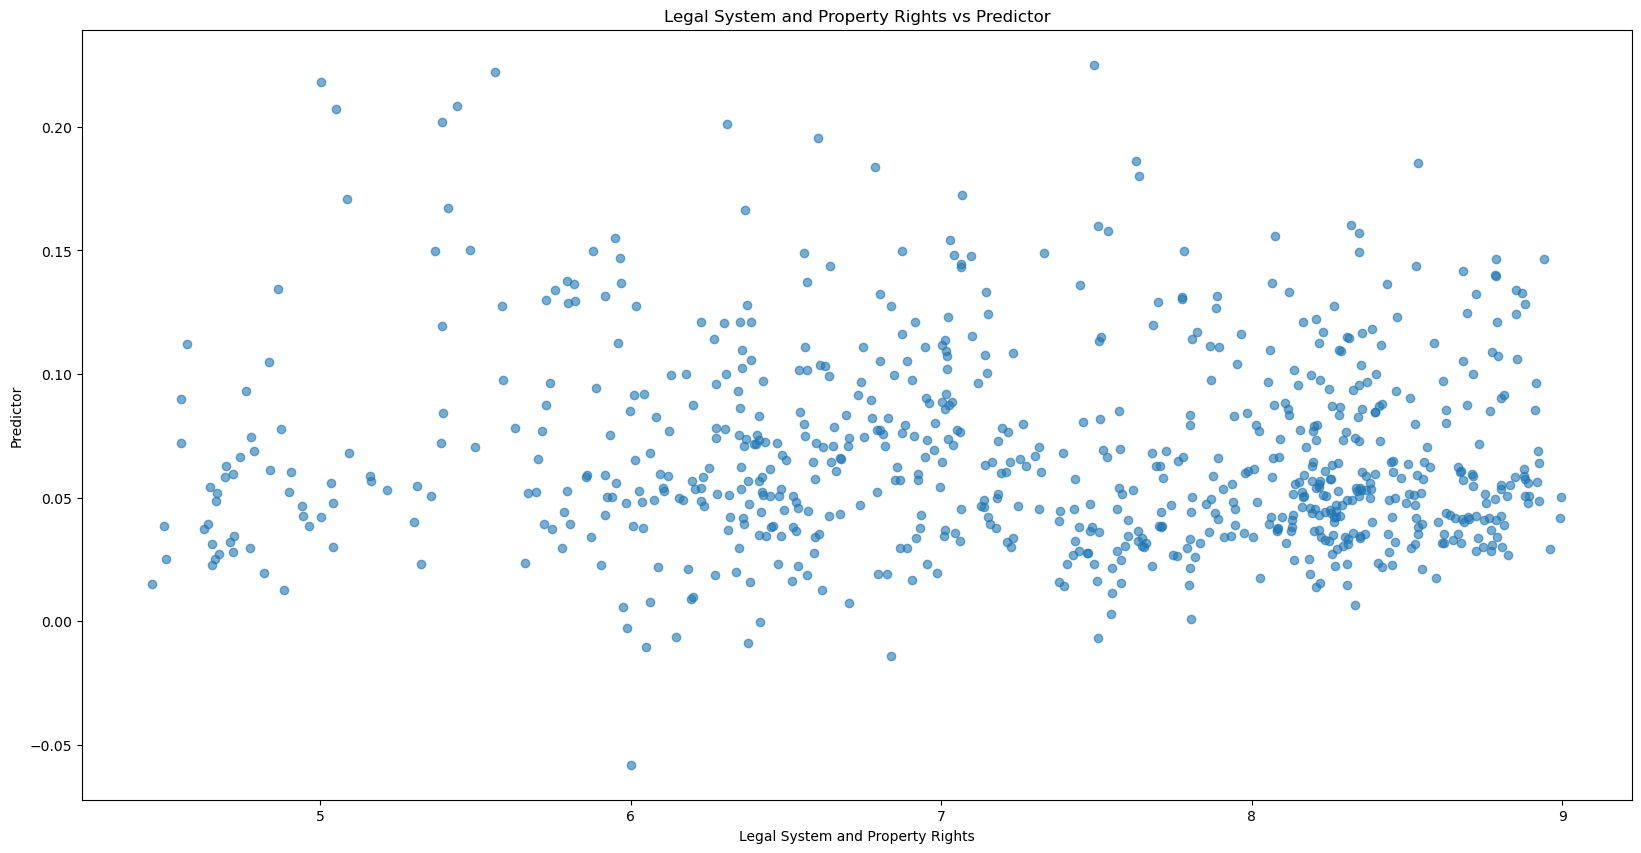

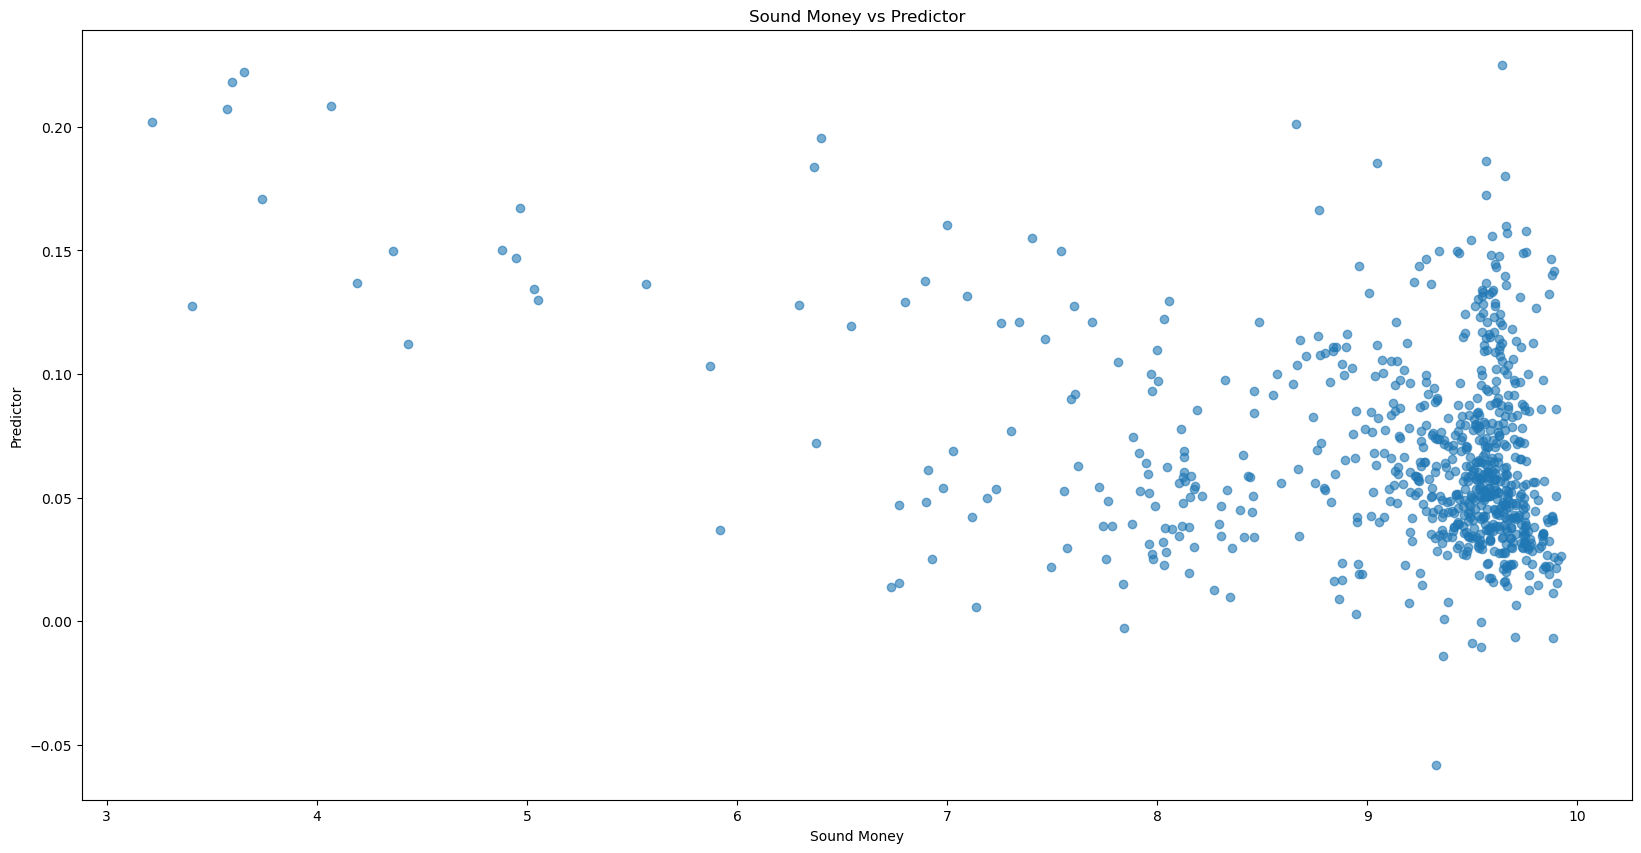

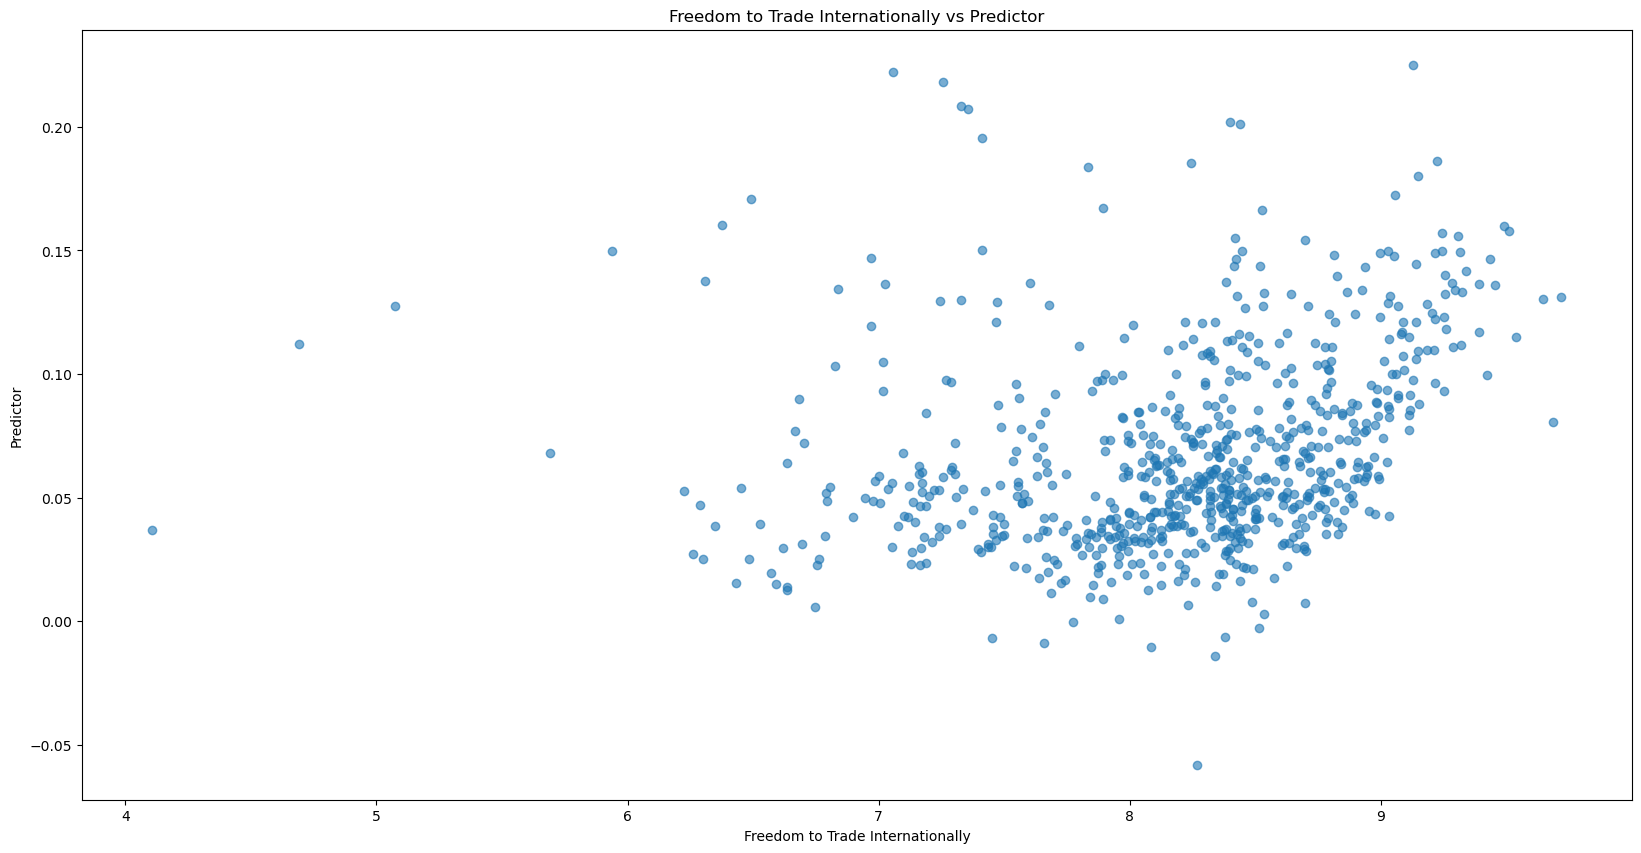

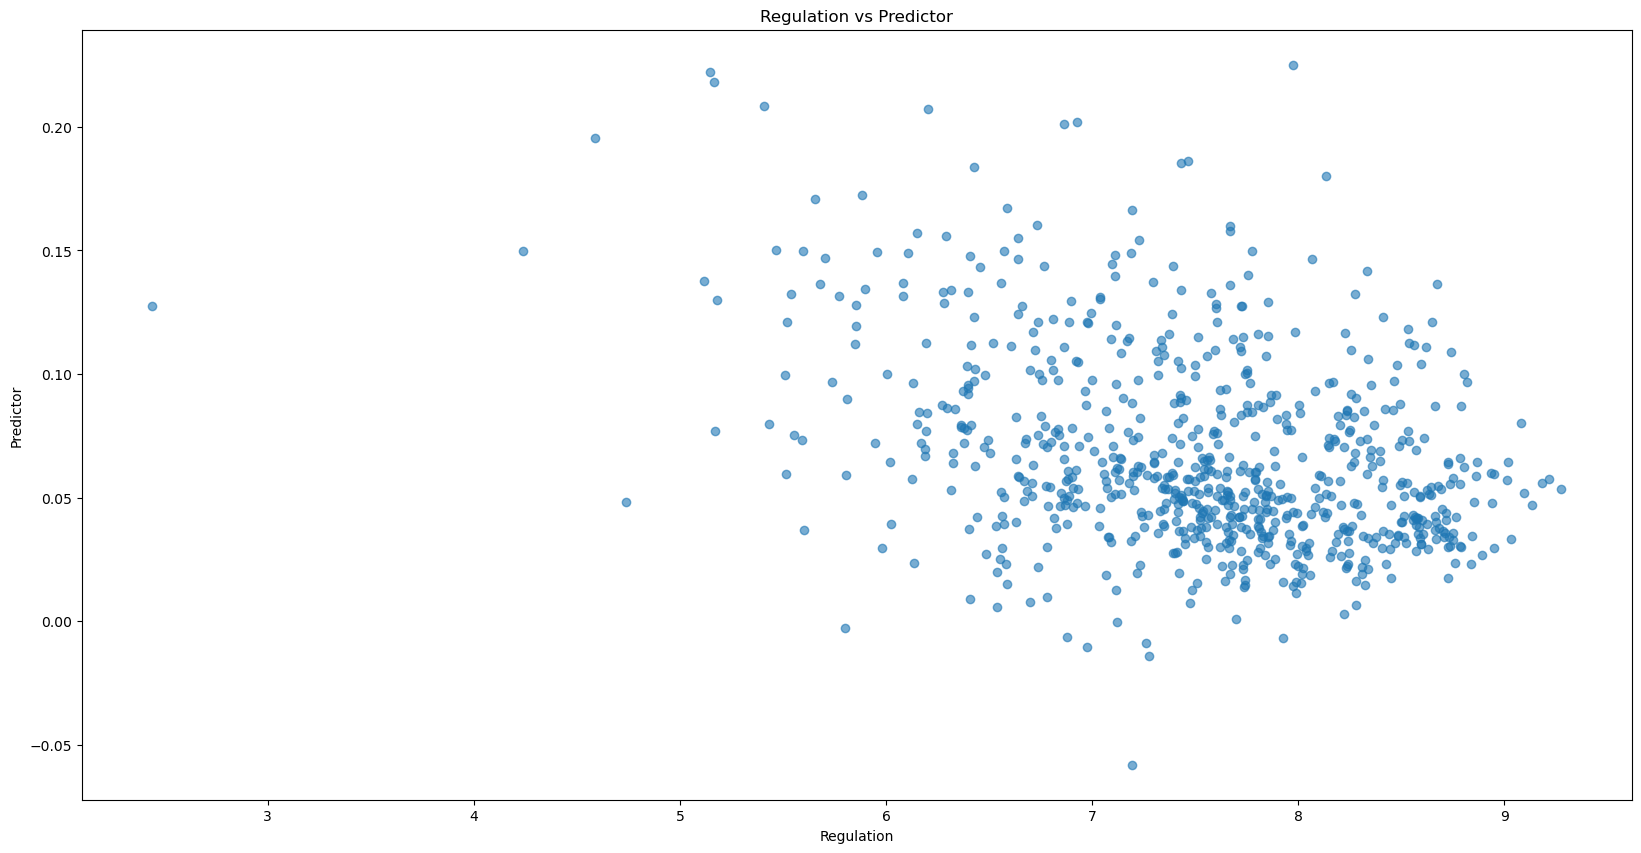

In [76]:
for var in x_vars:
    fig, ax = plt.subplots(figsize=(20, 10))
    plt.scatter(r_df[var], r_df["Predictor"], alpha = 0.6)
    plt.title(f"{var} vs Predictor")
    plt.xlabel(var)
    plt.ylabel("Predictor")
    plt.show()

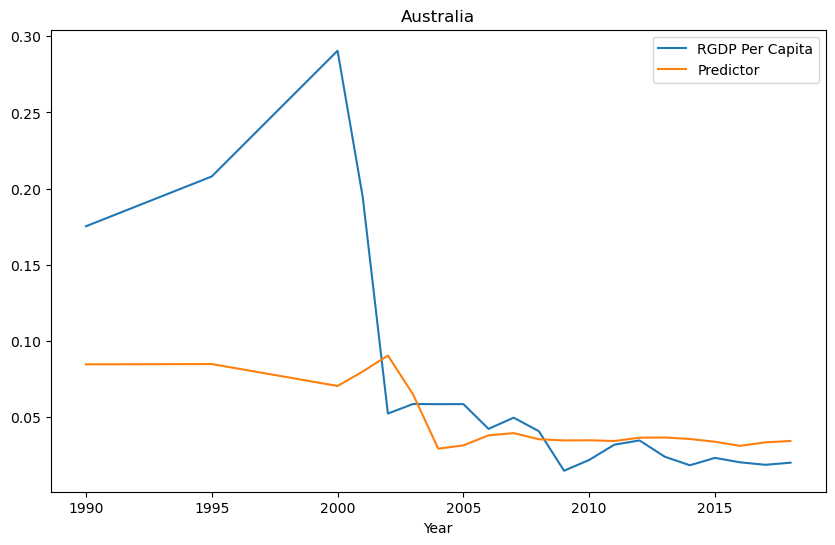

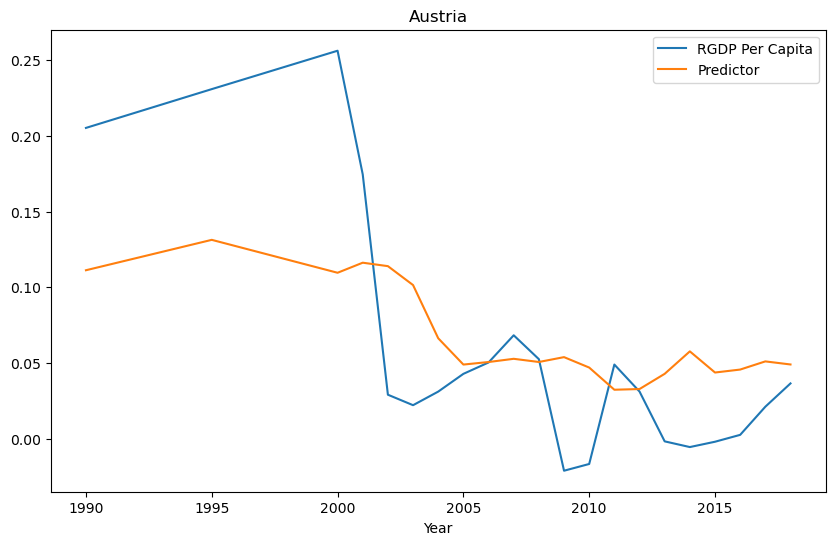

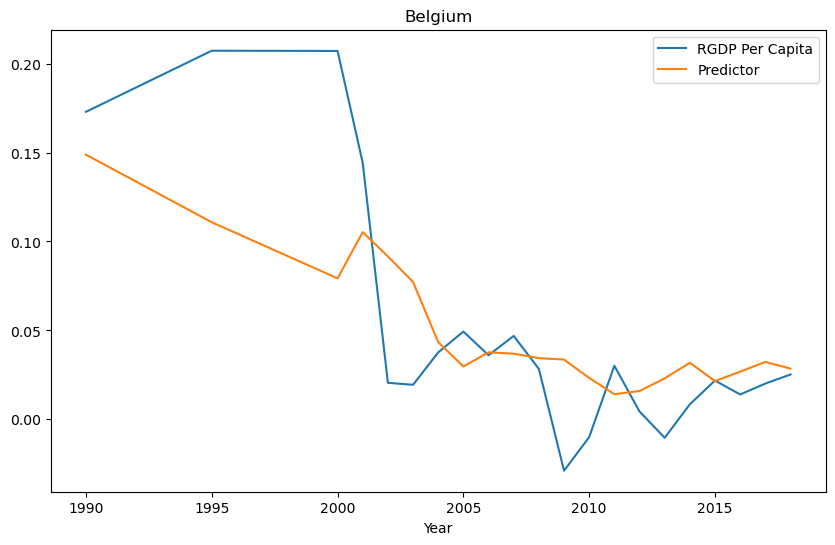

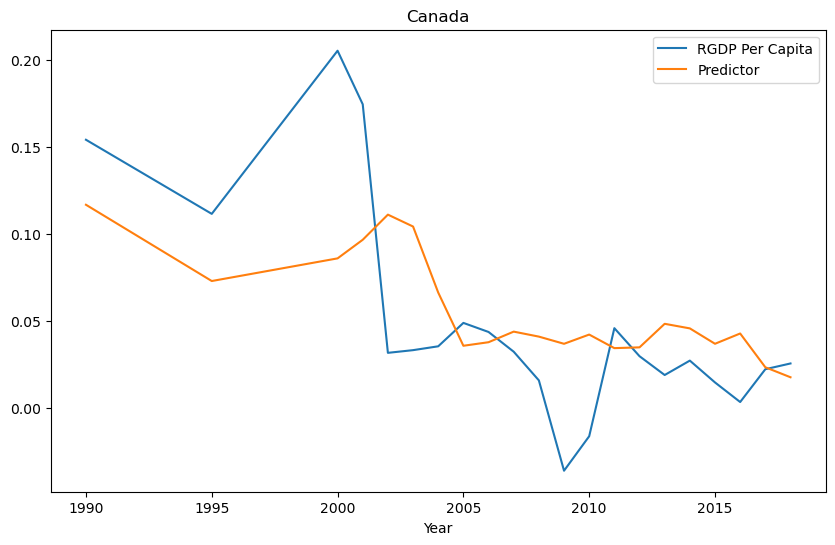

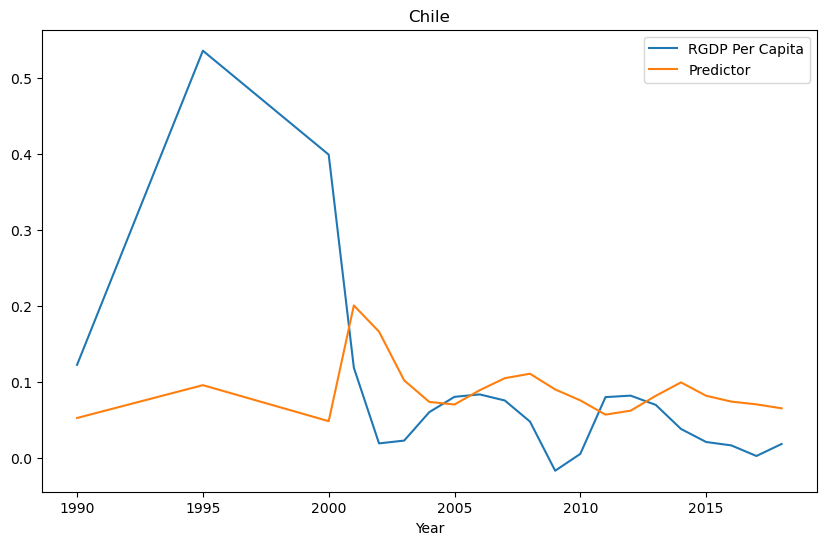

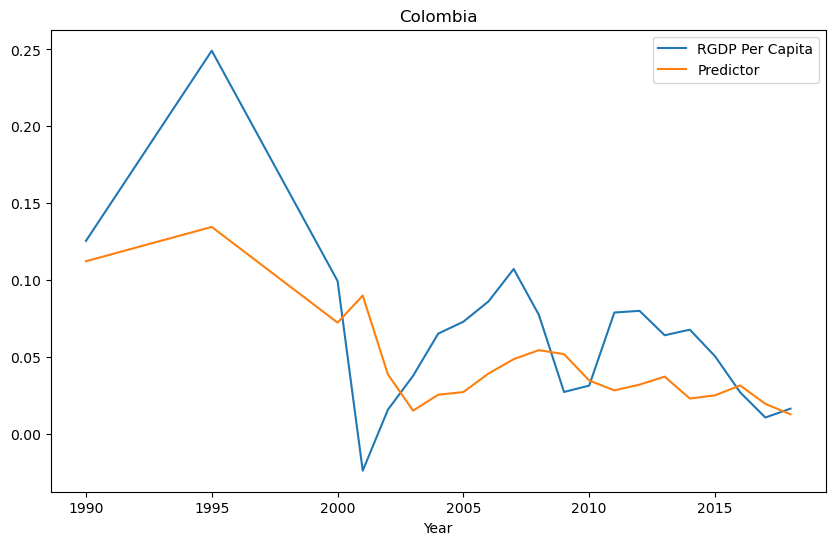

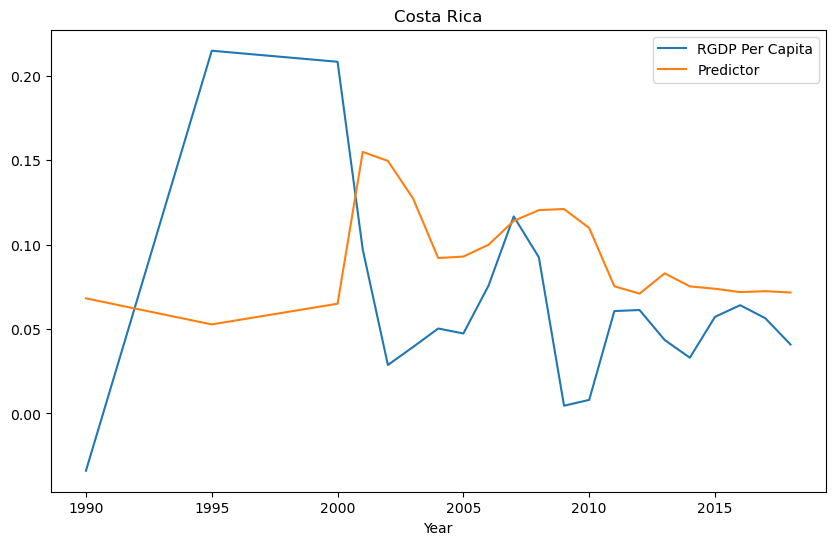

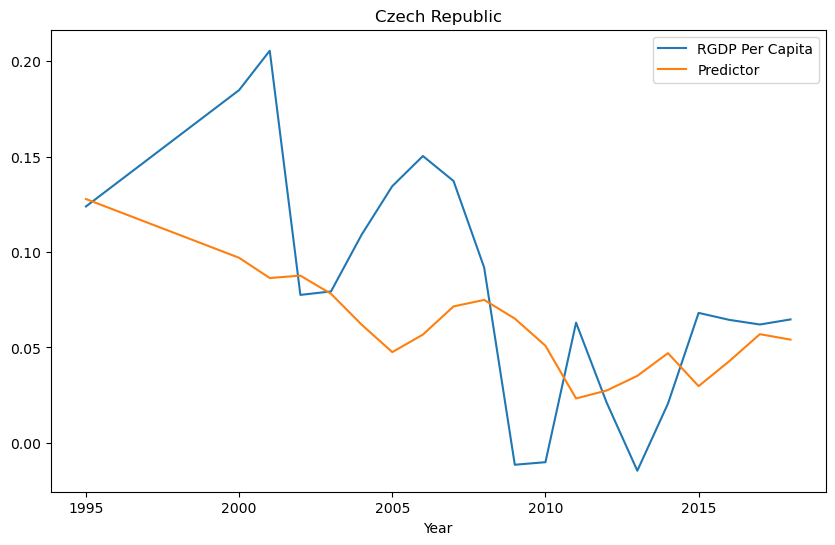

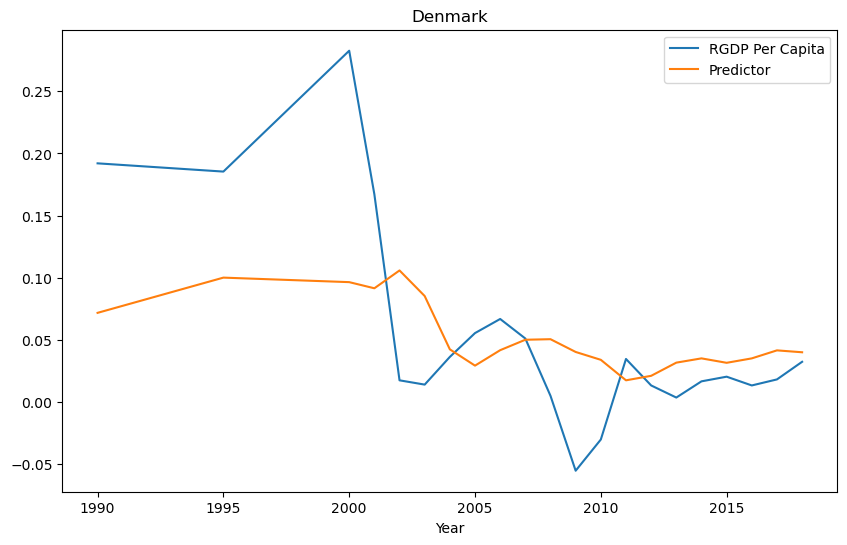

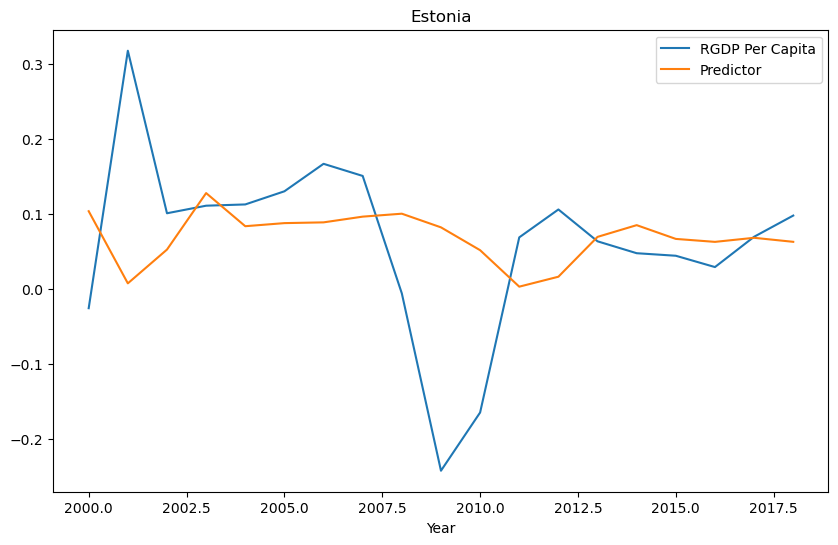

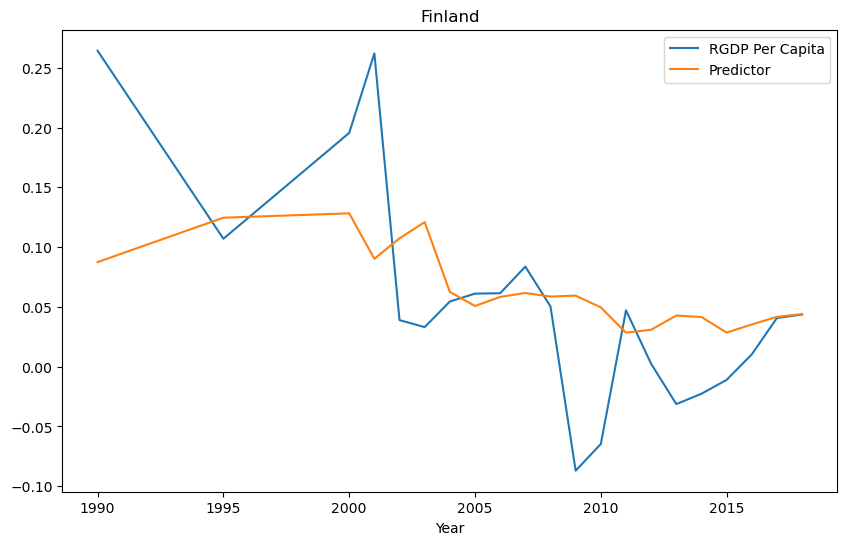

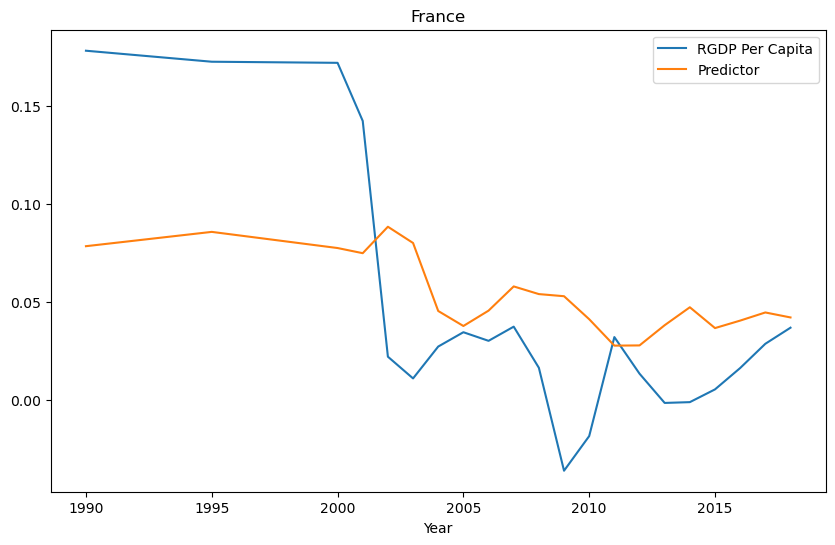

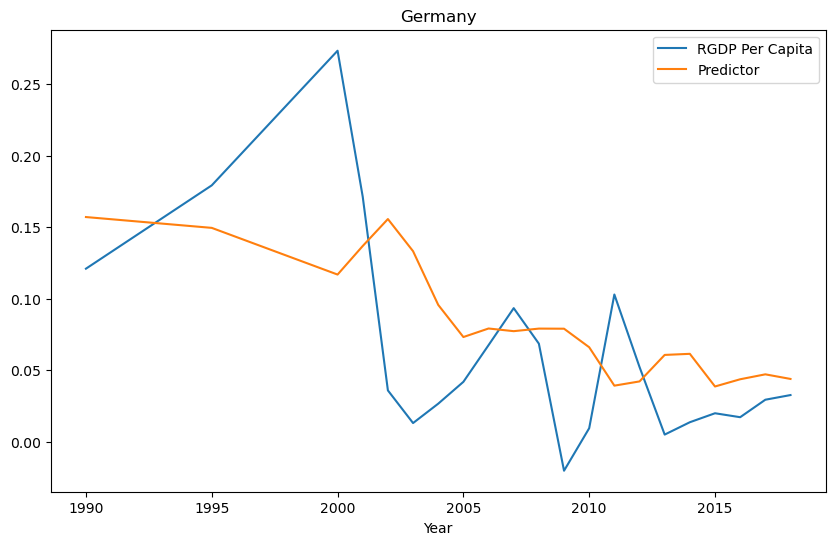

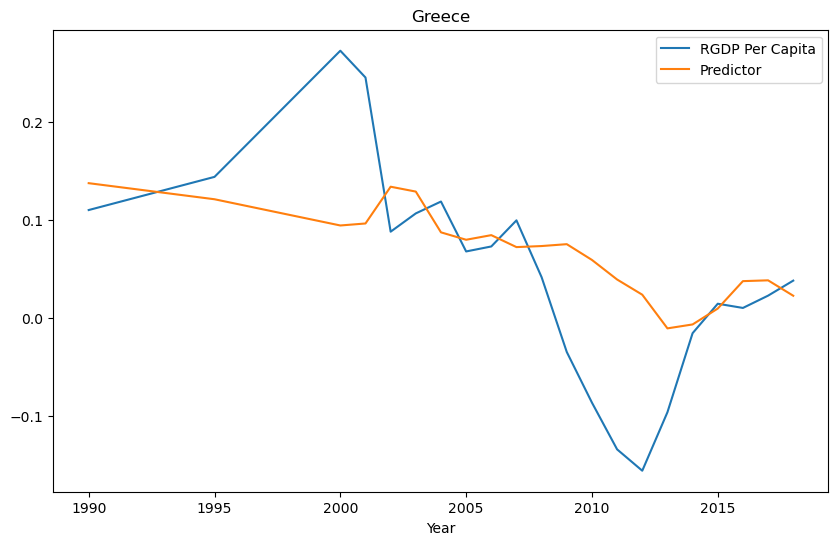

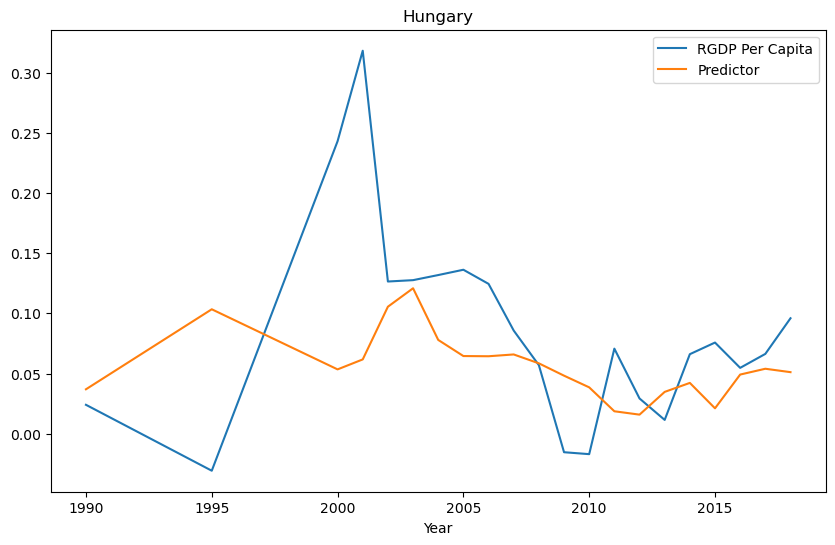

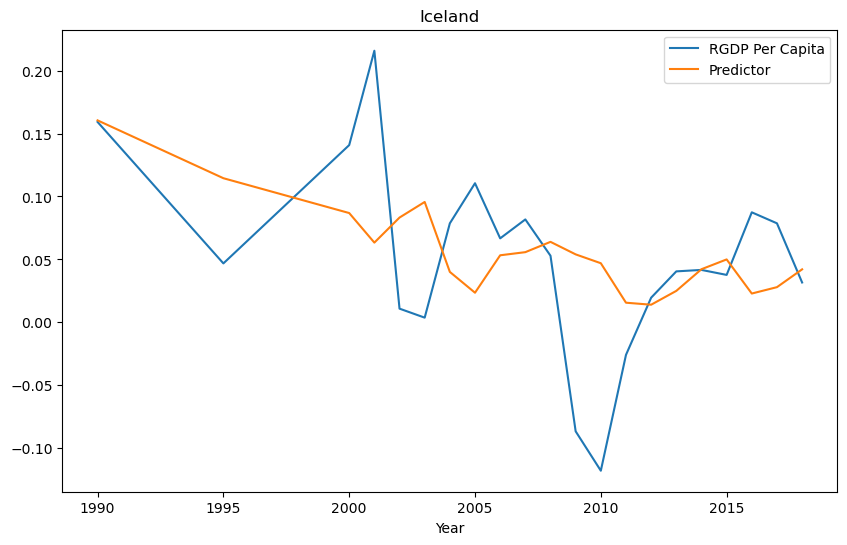

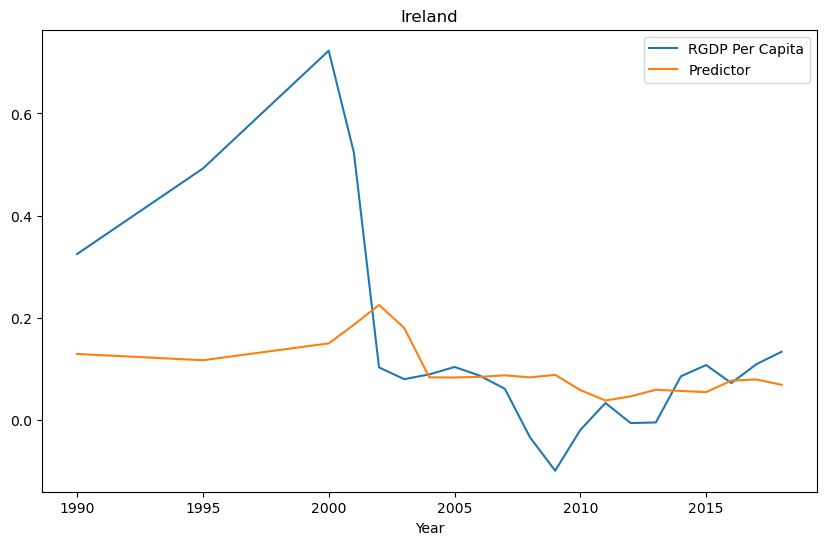

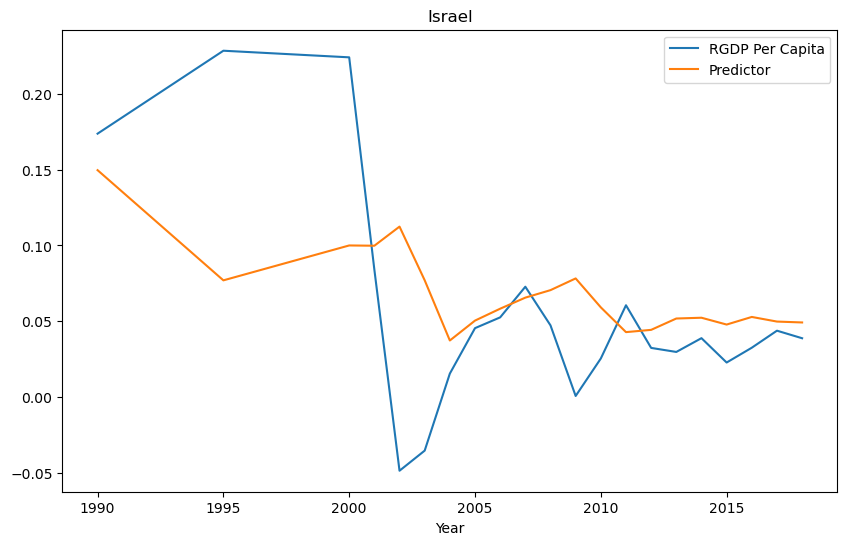

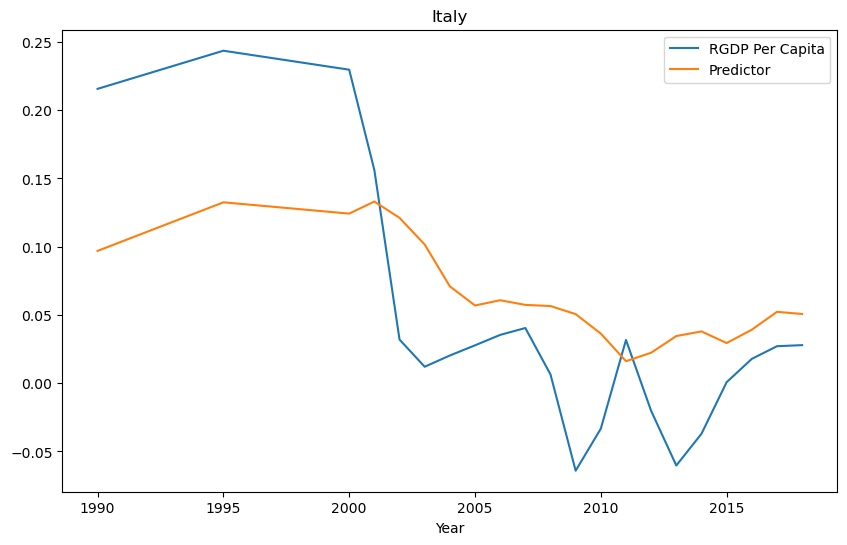

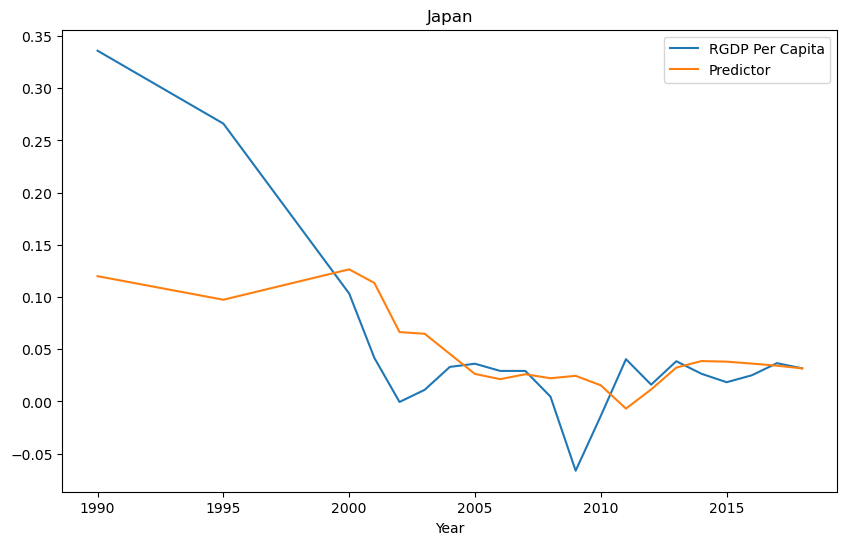

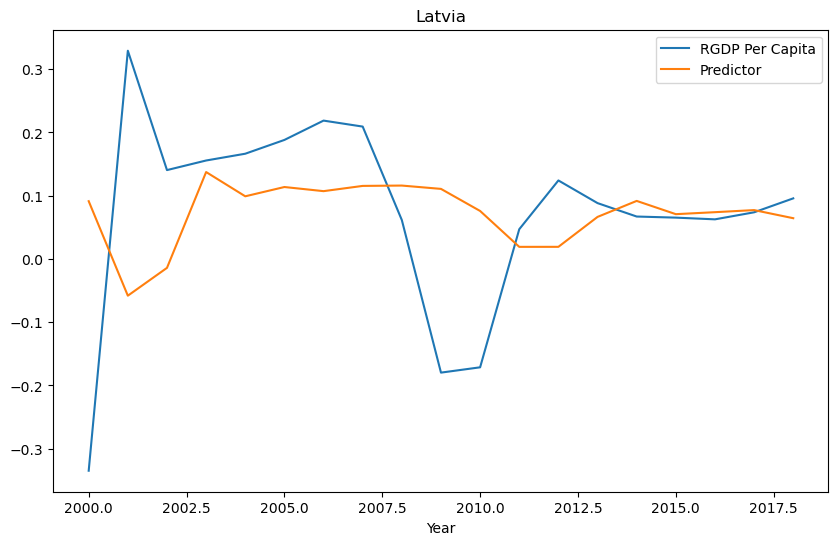

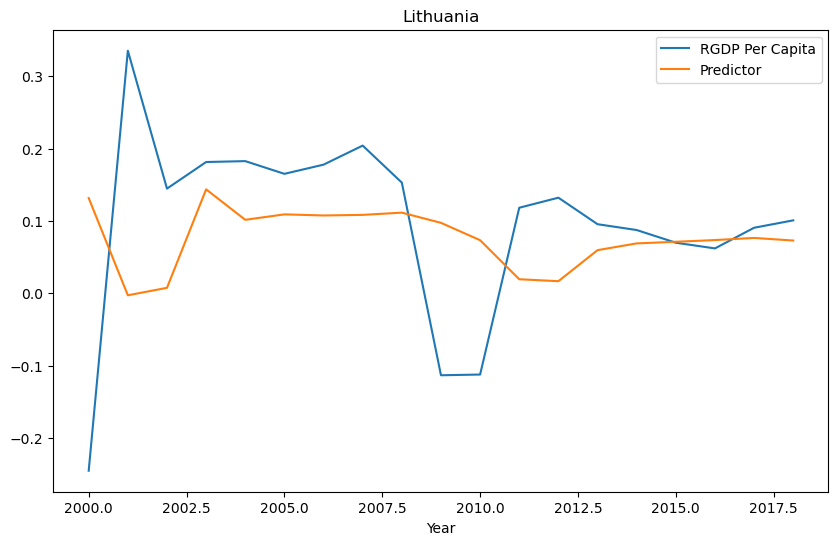

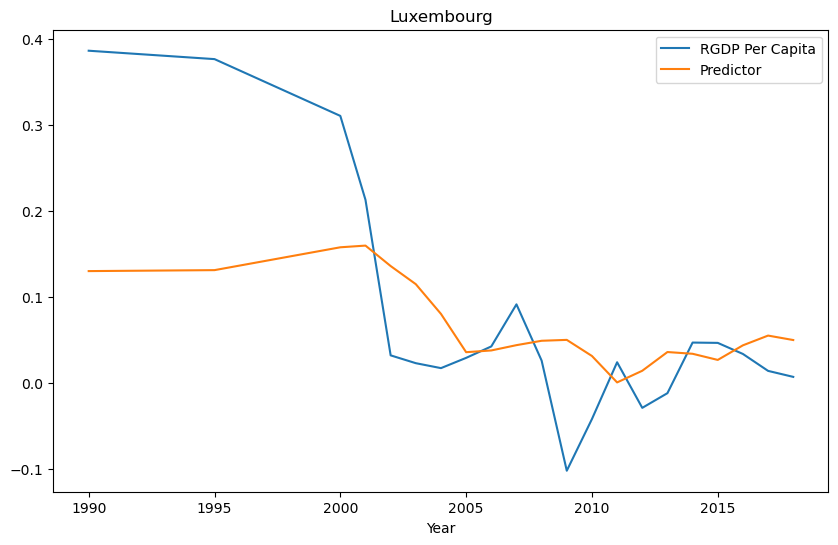

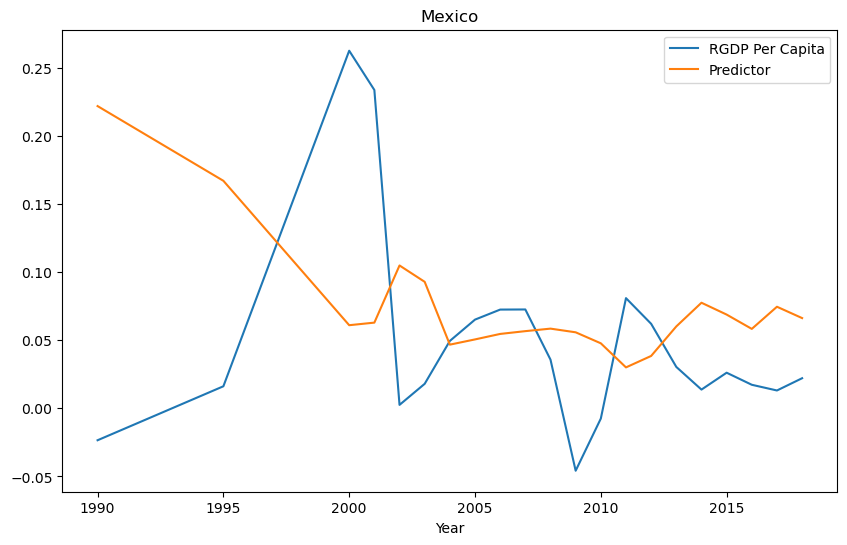

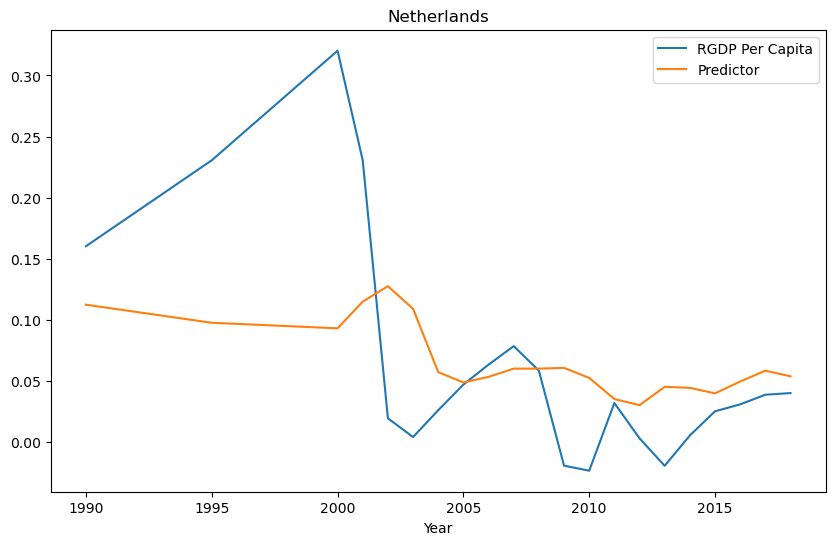

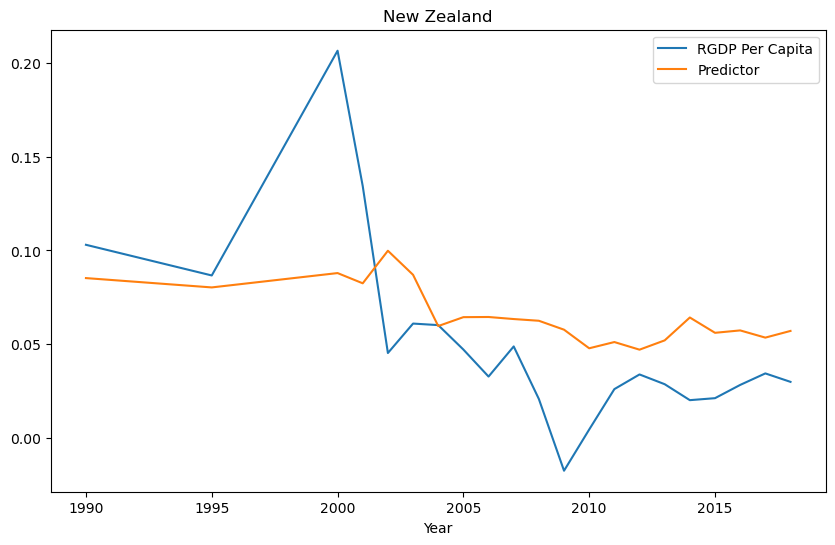

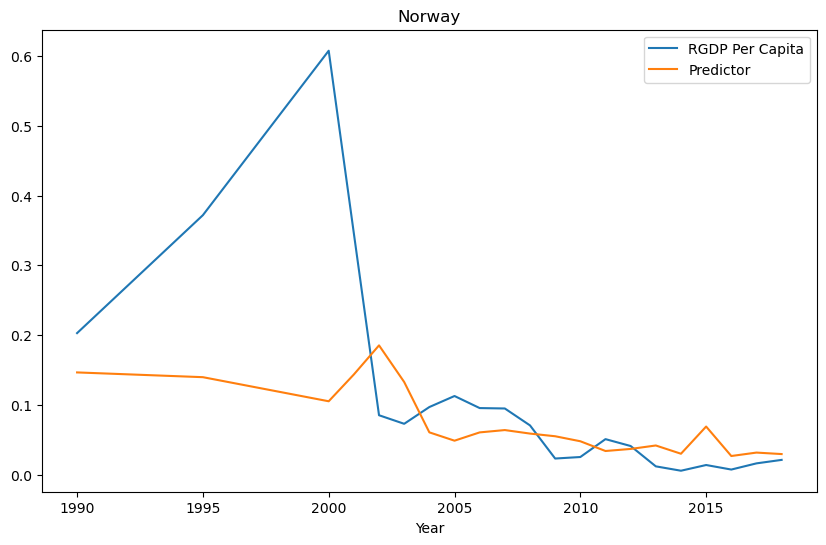

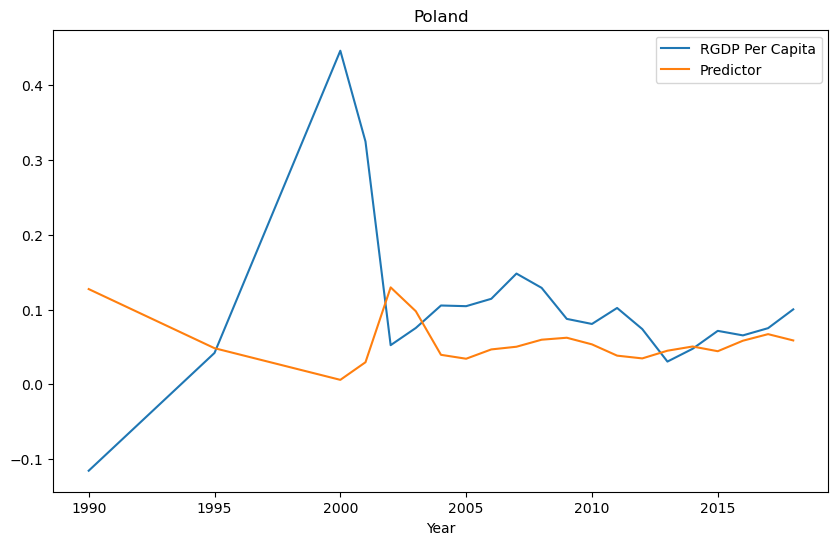

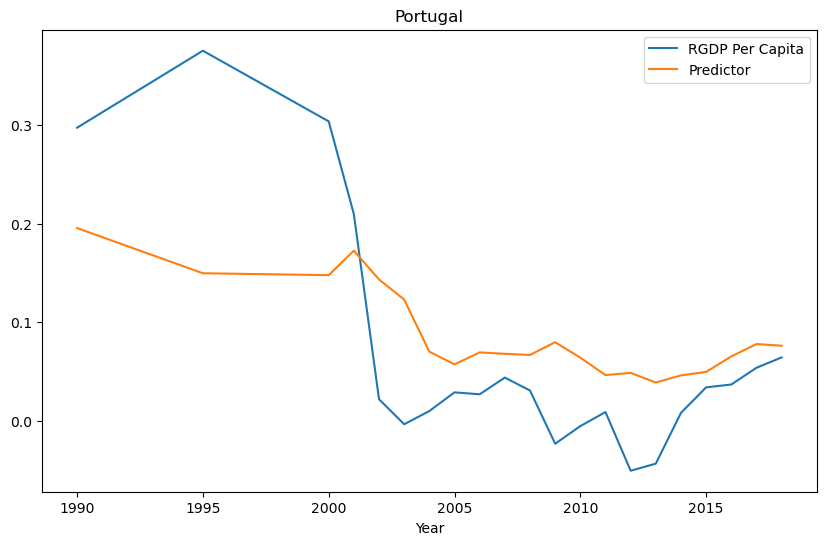

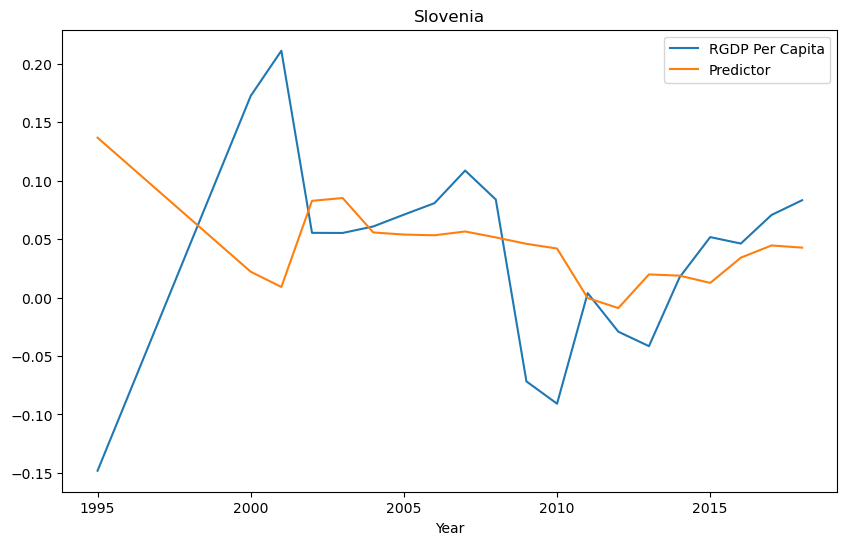

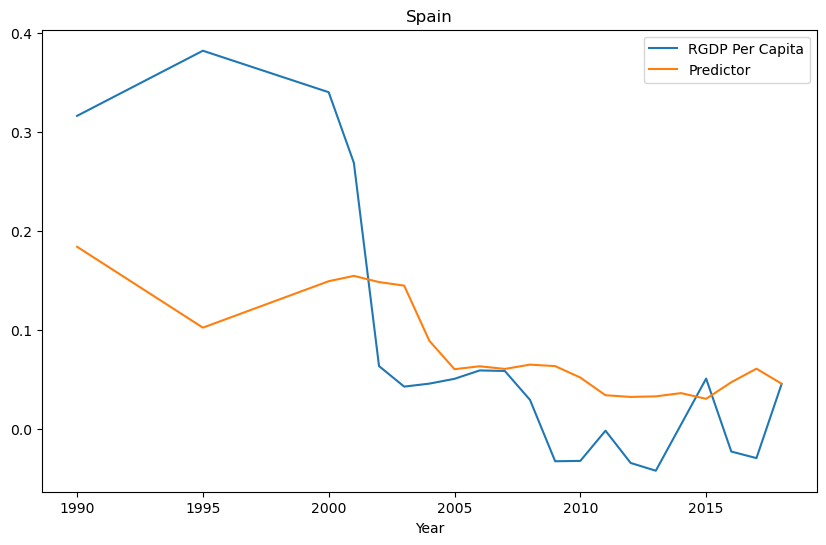

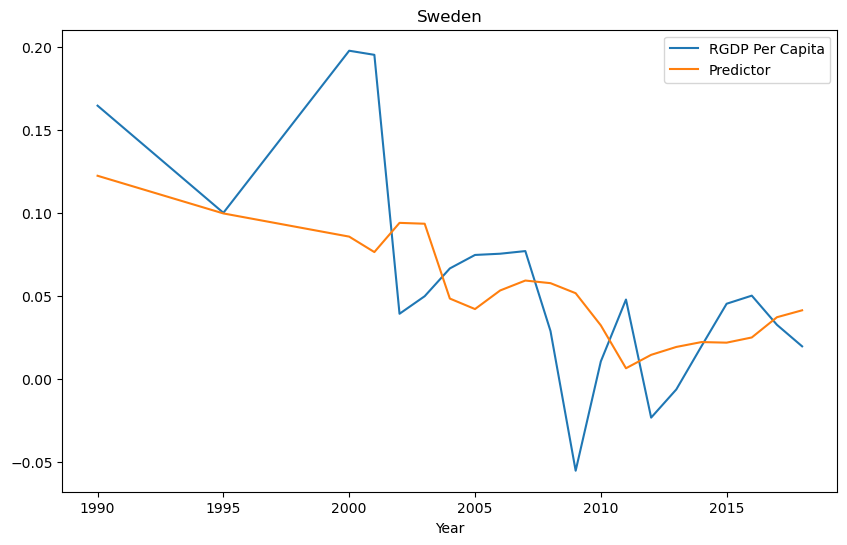

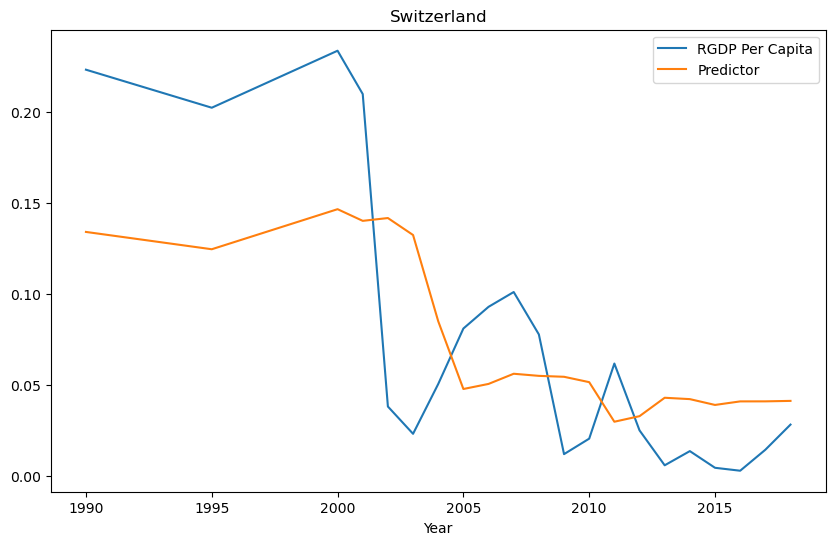

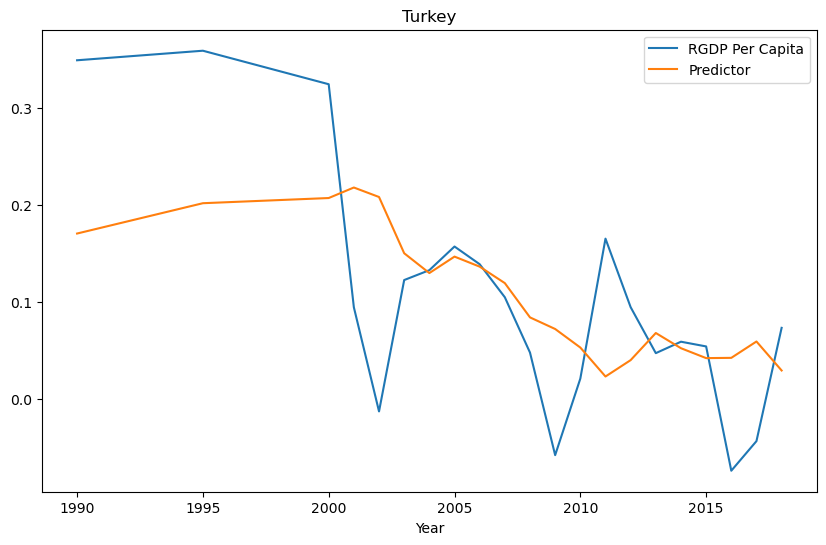

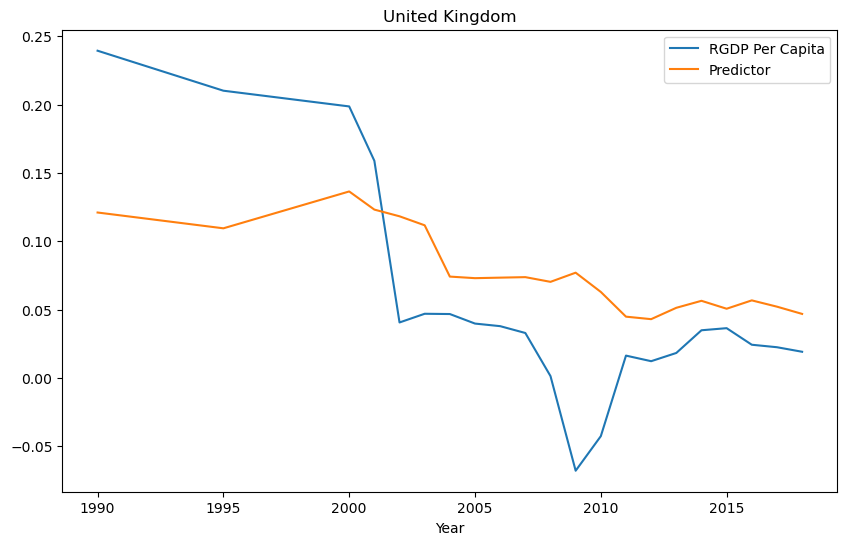

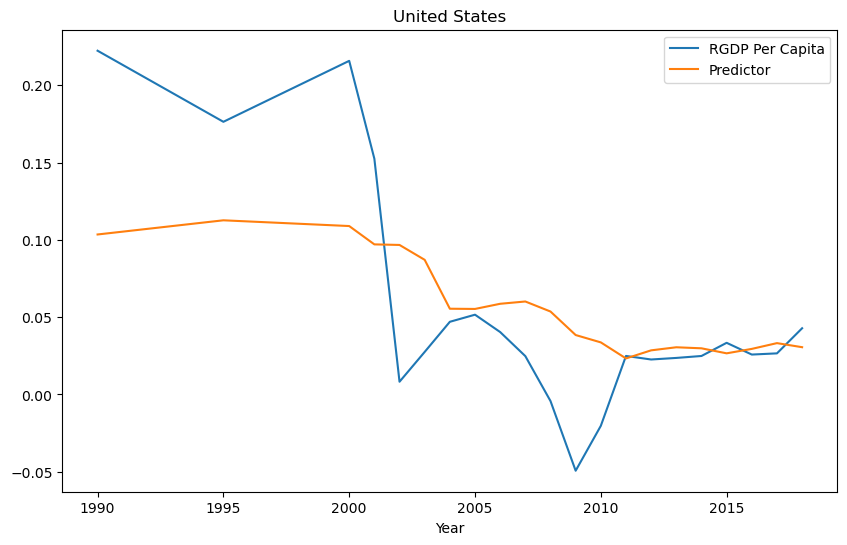

In [77]:
if 'Year' not in r_df.columns:
    r_df = r_df.reset_index(level='Year', drop=False)
grouped = r_df.groupby('Countries')

for country, group in grouped:
    fig, ax = plt.subplots(figsize=(10, 6))
    group.plot(x='Year', y=['RGDP Per Capita', 'Predictor'], ax=ax, legend=True)
    ax.set_title(country)
    plt.show()